# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [3]:
base_path = "data/구내식당"
# train 변수에 train.csv 데이터를 불러옵니다.
# test 변수에 test.csv 데이터를 불러옵니다.
# submission 변수에 sample_submission.csv 데이터를 불러옵니다.
train = pd.read_csv(f'{base_path}/train.csv')
test = pd.read_csv(f'{base_path}/test.csv')
submission = pd.read_csv(f'{base_path}/sample_submission.csv')

train.shape, test.shape, submission.shape

((1205, 12), (50, 10), (50, 3))

# 데이터 확인

In [4]:
train.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  월   2601      50     150             238          0.0   
1  2016-02-02  화   2601      50     173             319          0.0   
2  2016-02-03  수   2601      56     180             111          0.0   
3  2016-02-04  목   2601     104     220             355          0.0   
4  2016-02-05  금   2601     278     181              34          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2  모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3  모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4  모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0

In [5]:
test.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2021-01-27  수   2983      88     182               5        358.0   
1  2021-01-28  목   2983     104     212             409        348.0   
2  2021-01-29  금   2983     270     249               0        294.0   
3  2021-02-01  월   2924     108     154             538        322.0   
4  2021-02-02  화   2924      62     186             455        314.0   

                                                조식메뉴  \
0  모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1  모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   
2  모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...   
3  모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...   
4  모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...   

                                                중식메뉴  \
0  쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...   
1  쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...   
2  쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...   
3  쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...   
4  쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...   

                                            석식메뉴  
0  흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치   
1            충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지   
2            흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치   
3           흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치   
4       흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치

In [6]:
#info 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [8]:
# 결측치 확인  >> train, test 모두 결측치 없음
train.isnull().sum().sum()

0

In [9]:
test.isnull().sum().sum()

0

In [10]:
# 중복값 확인  >> train, test 모두 중복값 없음
train[train.duplicated()]

Empty DataFrame
Columns: [일자, 요일, 본사정원수, 본사휴가자수, 본사출장자수, 본사시간외근무명령서승인건수, 현본사소속재택근무자수, 조식메뉴, 중식메뉴, 석식메뉴, 중식계, 석식계]
Index: []

In [11]:
test[test.duplicated()]

Empty DataFrame
Columns: [일자, 요일, 본사정원수, 본사휴가자수, 본사출장자수, 본사시간외근무명령서승인건수, 현본사소속재택근무자수, 조식메뉴, 중식메뉴, 석식메뉴]
Index: []

## 전처리 해볼 것들 정리


* 일자, 요일을 숫자형태로 변경 필요함
* 중식/석식계만 있으므로 '조식메뉴' 컬럼 삭제해도 괜찮을듯
* 메뉴를 띄어쓰기를 기준으로 원핫인코딩 시킬 필요가 있어보임..

* 년,월,요일별 식사인원(중식계, 석식계)과의 연관성 보기
* 본사에 남아있는 인원과 식사인원(중식계, 석식계) 연관성
* 테스트 데이터로 인원 예측해보기

# 전처리

## 연,월,일,요일 만들기

In [12]:
train["일자"] = pd.to_datetime(train["일자"])
train["일자"].head(1)

0   2016-02-01
Name: 일자, dtype: datetime64[ns]

In [13]:
train["year"] = train["일자"].dt.year
train["month"] = train["일자"].dt.month
train["day"] = train["일자"].dt.day
train["요일"] = train["일자"].dt.dayofweek

print(train.shape)
train[["일자", "year", "month", "day", "요일"]].head()

(1205, 15)


일자  year  month  day  요일
0 2016-02-01  2016      2    1   0
1 2016-02-02  2016      2    2   1
2 2016-02-03  2016      2    3   2
3 2016-02-04  2016      2    4   3
4 2016-02-05  2016      2    5   4

In [14]:
# 연도월 파생변수 만들기
train['YM'] = train["일자"].astype(str).str[:7]

In [15]:
train['YM'].head()

0    2016-02
1    2016-02
2    2016-02
3    2016-02
4    2016-02
Name: YM, dtype: object

In [16]:
# 요일 한글로 만들기
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [17]:
# 요일 숫자 넘겨주면 요일명 반환하는 함수

def find_dayofweek(day_no):
    dayofweek="월화수목금토일"
    return dayofweek[day_no]


In [18]:
# 잘 만들어졌는지 확인
find_dayofweek(1)

'화'

In [19]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
train["요일명"] = train["요일"].map(find_dayofweek)

In [20]:
train[["요일", "요일명"]].sample(5)

요일 요일명
433    1   화
162    4   금
18     2   수
1102   3   목
575    1   화

### test에도 똑같이 전처리

In [21]:
test["일자"] = pd.to_datetime(test["일자"])
test["일자"].head(1)

0   2021-01-27
Name: 일자, dtype: datetime64[ns]

In [22]:
test["year"] = test["일자"].dt.year
test["month"] = test["일자"].dt.month
test["day"] = test["일자"].dt.day
test["요일"] = test["일자"].dt.dayofweek

# 연도월 파생변수 만들기
test['YM'] = test["일자"].astype(str).str[:7]

print(test.shape)
test[["일자", "year", "month", "day", "요일", "YM"]].head()

(50, 14)


일자  year  month  day  요일       YM
0 2021-01-27  2021      1   27   2  2021-01
1 2021-01-28  2021      1   28   3  2021-01
2 2021-01-29  2021      1   29   4  2021-01
3 2021-02-01  2021      2    1   0  2021-02
4 2021-02-02  2021      2    2   1  2021-02

## 조식 컬럼 삭제

In [23]:
train = train.drop(columns="조식메뉴")

In [24]:
train.head()

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0 2016-02-01   0   2601      50     150             238          0.0   
1 2016-02-02   1   2601      50     173             319          0.0   
2 2016-02-03   2   2601      56     180             111          0.0   
3 2016-02-04   3   2601     104     220             355          0.0   
4 2016-02-05   4   2601     278     181              34          0.0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  year  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  2016   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  2016   
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  2016   
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  2016   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0  2016   

   month  day       YM 요일명  
0      2    1  2016-02   월  
1      2    2  2016-02   화  
2      2    3  2016-02   수  
3      2    4  2016-02   목  
4      2    5  2016-02   금

In [25]:
test = test.drop(columns="조식메뉴")

In [26]:
test.head()

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0 2021-01-27   2   2983      88     182               5        358.0   
1 2021-01-28   3   2983     104     212             409        348.0   
2 2021-01-29   4   2983     270     249               0        294.0   
3 2021-02-01   0   2924     108     154             538        322.0   
4 2021-02-02   1   2924      62     186             455        314.0   

                                                중식메뉴  \
0  쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...   
1  쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...   
2  쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...   
3  쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...   
4  쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...   

                                            석식메뉴  year  month  day       YM  
0  흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치   2021      1   27  2021-01  
1            충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지   2021      1   28  2021-01  
2            흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치   2021      1   29  2021-01  
3           흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치   2021      2    1  2021-02  
4       흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치   2021      2    2  2021-02

## 메뉴컬럼 정리
* 띄어쓰기를 중심으로 피처 나누기

### 점심메뉴 만들기

In [276]:
# 샐러드가 추가된 시작일
train.iloc[1067:]

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
1067 2020-07-01   2   2997      71     252               9        153.0   
1068 2020-07-02   3   2997      82     268             446        152.0   
1069 2020-07-03   4   2997     261     288               1        157.0   
1070 2020-07-06   0   2997     126     220             626        172.0   
1071 2020-07-07   1   2997      77     242             575        152.0   
1072 2020-07-08   2   2997      77     251               7        158.0   
1073 2020-07-09   3   2997      99     290             449        159.0   
1074 2020-07-10   4   2997     233     290               0        135.0   
1075 2020-07-13   0   2997     118     225             632        148.0   
1076 2020-07-14   1   2997      80     224             561        143.0   
1077 2020-07-15   2   2997      80     248               4        183.0   
1078 2020-07-16   3   2997     102     274             411        166.0   
1079 2020-07-17   4   2997     249     291               2        148.0   
1080 2020-07-20   0   2997     157     220             518        140.0   
1081 2020-07-21   1   2997     138     222             519        129.0   
1082 2020-07-22   2   2997     165     250               9        149.0   
1083 2020-07-23   3   2997     156     274             377        134.0   
1084 2020-07-24   4   2997     344     281               0        115.0   
1085 2020-07-27   0   2997     271     182             728        120.0   
1086 2020-07-28   1   2997     252     213             565        150.0   
1087 2020-07-29   2   2997     256     233              11        150.0   
1088 2020-07-30   3   2997     346     242             395        130.0   
1089 2020-07-31   4   2997     496     261               0        125.0   
1090 2020-08-03   0   2989     494     155             446        115.0   
1091 2020-08-04   1   2989     464     172             463        115.0   
1092 2020-08-05   2   2989     490     182               7        115.0   
1093 2020-08-06   3   2989     482     218             364        109.0   
1094 2020-08-07   4   2989     605     239               1        142.0   
1095 2020-08-10   0   2989     476     191             548         95.0   
1096 2020-08-11   1   2989     456     188             465        102.0   
1097 2020-08-12   2   2989     449     213              12        111.0   
1098 2020-08-13   3   2989     504     245             353        112.0   
1099 2020-08-14   4   2989     644     256               1        116.0   
1100 2020-08-18   1   2989     469     195             534        105.0   
1101 2020-08-19   2   2989     420     227              10        126.0   
1102 2020-08-20   3   2989     390     232             477        125.0   
1103 2020-08-21   4   2989     497     249               0        149.0   
1104 2020-08-24   0   2989     302     185             683        249.0   
1105 2020-08-25   1   2989     219     190             757        285.0   
1106 2020-08-26   2   2989     215     197               2        363.0   
1107 2020-08-27   3   2989     205     211             575        316.0   
1108 2020-08-28   4   2989     320     230               0        297.0   
1109 2020-08-31   0   2989     183     163             648        464.0   
1110 2020-09-01   1   3132      73     111             630        527.0   
1111 2020-09-02   2   3132      78     155               0        522.0   
1112 2020-09-03   3   3132     119     195             531        511.0   
1113 2020-09-04   4   3132     208     221               3        462.0   
1114 2020-09-07   0   3132     122     163             774        439.0   
1115 2020-09-08   1   3132      91     173             730        441.0   
1116 2020-09-09   2   3132     102     180               3        424.0   
1117 2020-09-10   3   3132     106     220             600        430.0   
1118 2020-09-11   4   3132     211     259               2        376.0   
1119 2020-09-14   0   3132     102    

In [32]:
# 전체 행 출력해서 살펴보기
pd.set_option('display.max_rows', None)

In [74]:
# 점심 메뉴만 꺼내서 확인해보기
lunch_menu = pd.DataFrame(train["중식메뉴"].str.split(' ').tolist())

In [75]:
lunch_menu

0                1                  2   \
0                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)              오징어찌개   
1                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)               김치찌개   
2                   카레덮밥     (쌀,현미흑미:국내산)               팽이장국   
3                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)              쇠고기무국   
4                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)                 떡국   
5                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)               시래기국   
6                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)                꽃게탕   
7                 쌀밥/잡곡밥          (쌀:국내산)               시금치국   
8                 쌀밥/잡곡밥          (쌀:국내산)              쇠고기무국   
9                 쌀밥/잡곡밥          (쌀:국내산)              냉이된장국   
10                 낙지비빔밥   (낙지:중국산,쌀:국내산)               유부장국   
11                쌀밥/잡곡밥          (쌀:국내산)               대구찌개   
12                쌀밥/오곡밥          (쌀:국내산)            쇠고기느타리국   
13                쌀밥/잡곡밥          (쌀:국내산)               콩나물국   
14                   비빔밥          (쌀:국내산)               팽이장국   
15                쌀밥/잡곡밥          (쌀:국내산)              북어계란국   
16                쌀밥/잡곡밥          (쌀:국내산)               수제비국   
17                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             얼갈이된장국   
18                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             쇠고기미역국   
19                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              근대된장국   
20                쌀밥/잡곡밥     (쌀,현미흑미:국내산)               부대찌개   
21                쌀밥/잡곡밥     (쌀,현미흑미:국내산)               콩나물국   
22                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             차돌박이찌개   
23                쌀밥/잡곡밥     (쌀,현미흑미:국내산)                북어국   
24                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              고추장찌개   
25                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              배추된장국   
26                쌀밥/잡곡밥          (쌀:국내산)                어묵국   
27                쌀밥/잡곡밥          (쌀:국내산)                 쑥국   
28                  곤드레밥          (쌀:국내산)             콩나물김치국   
29                쌀밥/잡곡밥          (쌀:국내산)             사골우거지국   
30                쌀밥/잡곡밥          (쌀:국내산)               시금치국   
31                                 쌀밥/잡곡밥            (쌀:국내산)   
32                                 쌀밥/잡곡밥            (쌀:국내산)   
33                               콩나물밥*달래장            (쌀:국내산)   
34                                 쌀밥/잡곡밥            (쌀:국내산)   
35                                 쌀밥/잡곡밥            (쌀:국내산)   
36                                 쌀밥/잡곡밥            (쌀:국내산)   
37                                 쌀밥/잡곡밥            (쌀:국내산)   
38                                 봄새싹비빔밥            (쌀:국내산)   
39                                 쌀밥/잡곡밥            (쌀:국내산)   
40                                 쌀밥/잡곡밥            (쌀:국내산)   
41                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              순두부찌개   
42                쌀밥/잡곡밥     (쌀,현미흑미:국내산)                북어국   
43                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             올갱이아욱국   
44                쌀밥/잡곡밥     (쌀,현미흑미:국내산)                어묵국   
45                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              배추된장국   
46                쌀밥/잡곡밥     (쌀,현미흑미:국내산)               시래기국   
47                쌀밥/잡곡밥     (쌀,현미흑미:국내산)               부대찌개   
48                쌀밥/잡곡밥     (쌀,현미흑미:국내산)                      
49                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             냉이된장찌개   
50                쌀밥/잡곡밥          (쌀:국내산)              배추된장국   
51                쌀밥/잡곡밥          (쌀:국내산)                육개장   
52                  콩나물밥                               근대된장국   
53                쌀밥/잡곡밥          (쌀:국내산)              대구매운탕   
54                쌀밥/잡곡밥          (쌀:국내산)                북어국   
55                쌀밥/잡곡밥          (쌀:국내산)               콩나물국   
56                쌀밥/잡곡밥          (쌀:국내산)              쇠고기무국   
57                 나물비빔밥          (쌀:국내산)               미소장국   
58                쌀밥/잡곡밥          (쌀:국내산)                미역국   
59                쌀밥/잡곡밥          (쌀:국내산)             돈육김치찌개   
60                쌀밥/잡곡밥          (쌀:국내산)               시금치국   
61                  곤드레밥          (쌀:국내산)             

In [76]:
# 어떤식으로 자를 수 있을지 고민중. . . 
lunch_menu.iloc[0][lunch_menu.iloc[0].str.contains('밥')==True][0]

'쌀밥/잡곡밥'

In [77]:
# 연습중.. . ??
rice, soup, menu1,  = []
for row in range (len(lunch_menu)):
    rice.append(lunch_menu.iloc[0][lunch_menu.iloc[0].str.contains('밥')==True][0])

['쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',

In [78]:
lunch_menu["밥"] = rice

In [79]:
lunch_menu

0                1                  2  \
0                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)              오징어찌개   
1                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)               김치찌개   
2                   카레덮밥     (쌀,현미흑미:국내산)               팽이장국   
3                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)              쇠고기무국   
4                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)                 떡국   
5                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)               시래기국   
6                 쌀밥/잡곡밥     (쌀,현미흑미:국내산)                꽃게탕   
7                 쌀밥/잡곡밥          (쌀:국내산)               시금치국   
8                 쌀밥/잡곡밥          (쌀:국내산)              쇠고기무국   
9                 쌀밥/잡곡밥          (쌀:국내산)              냉이된장국   
10                 낙지비빔밥   (낙지:중국산,쌀:국내산)               유부장국   
11                쌀밥/잡곡밥          (쌀:국내산)               대구찌개   
12                쌀밥/오곡밥          (쌀:국내산)            쇠고기느타리국   
13                쌀밥/잡곡밥          (쌀:국내산)               콩나물국   
14                   비빔밥          (쌀:국내산)               팽이장국   
15                쌀밥/잡곡밥          (쌀:국내산)              북어계란국   
16                쌀밥/잡곡밥          (쌀:국내산)               수제비국   
17                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             얼갈이된장국   
18                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             쇠고기미역국   
19                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              근대된장국   
20                쌀밥/잡곡밥     (쌀,현미흑미:국내산)               부대찌개   
21                쌀밥/잡곡밥     (쌀,현미흑미:국내산)               콩나물국   
22                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             차돌박이찌개   
23                쌀밥/잡곡밥     (쌀,현미흑미:국내산)                북어국   
24                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              고추장찌개   
25                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              배추된장국   
26                쌀밥/잡곡밥          (쌀:국내산)                어묵국   
27                쌀밥/잡곡밥          (쌀:국내산)                 쑥국   
28                  곤드레밥          (쌀:국내산)             콩나물김치국   
29                쌀밥/잡곡밥          (쌀:국내산)             사골우거지국   
30                쌀밥/잡곡밥          (쌀:국내산)               시금치국   
31                                 쌀밥/잡곡밥            (쌀:국내산)   
32                                 쌀밥/잡곡밥            (쌀:국내산)   
33                               콩나물밥*달래장            (쌀:국내산)   
34                                 쌀밥/잡곡밥            (쌀:국내산)   
35                                 쌀밥/잡곡밥            (쌀:국내산)   
36                                 쌀밥/잡곡밥            (쌀:국내산)   
37                                 쌀밥/잡곡밥            (쌀:국내산)   
38                                 봄새싹비빔밥            (쌀:국내산)   
39                                 쌀밥/잡곡밥            (쌀:국내산)   
40                                 쌀밥/잡곡밥            (쌀:국내산)   
41                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              순두부찌개   
42                쌀밥/잡곡밥     (쌀,현미흑미:국내산)                북어국   
43                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             올갱이아욱국   
44                쌀밥/잡곡밥     (쌀,현미흑미:국내산)                어묵국   
45                쌀밥/잡곡밥     (쌀,현미흑미:국내산)              배추된장국   
46                쌀밥/잡곡밥     (쌀,현미흑미:국내산)               시래기국   
47                쌀밥/잡곡밥     (쌀,현미흑미:국내산)               부대찌개   
48                쌀밥/잡곡밥     (쌀,현미흑미:국내산)                      
49                쌀밥/잡곡밥     (쌀,현미흑미:국내산)             냉이된장찌개   
50                쌀밥/잡곡밥          (쌀:국내산)              배추된장국   
51                쌀밥/잡곡밥          (쌀:국내산)                육개장   
52                  콩나물밥                               근대된장국   
53                쌀밥/잡곡밥          (쌀:국내산)              대구매운탕   
54                쌀밥/잡곡밥          (쌀:국내산)                북어국   
55                쌀밥/잡곡밥          (쌀:국내산)               콩나물국   
56                쌀밥/잡곡밥          (쌀:국내산)              쇠고기무국   
57                 나물비빔밥          (쌀:국내산)               미소장국   
58                쌀밥/잡곡밥          (쌀:국내산)                미역국   
59                쌀밥/잡곡밥          (쌀:국내산)             돈육김치찌개   
60                쌀밥/잡곡밥          (쌀:국내산)               시금치국   
61                  곤드레밥          (쌀:국내산)              

In [175]:
# 점심메뉴 리스트 만들기
lunch_menu_list = []

for day in range(len(train)): # 각 행별로 가져오기
    tmp = train.loc[day, '중식메뉴'].split(' ') #띄어쓰기 별로 각각 리스트에 넣어주기
    
    for menu in tmp:
        if '(' in menu:  # 괄호 메뉴 제거
            tmp.remove(menu)
        tmp = ' '.join(tmp).split() # 공백 제거

    lunch_menu_list.append(tmp)

In [176]:
# 잘되었는지 데이터프레임 만들어서 확인
lunch_menu = pd.DataFrame(lunch_menu_list)
lunch_menu

0          1            2              3              4  \
0            쌀밥/잡곡밥      오징어찌개         쇠불고기            계란찜          청포묵무침   
1            쌀밥/잡곡밥       김치찌개        가자미튀김        모둠소세지구이          마늘쫑무침   
2              카레덮밥       팽이장국         치킨핑거         쫄면야채무침          견과류조림   
3            쌀밥/잡곡밥      쇠고기무국        주꾸미볶음            부추전          시금치나물   
4            쌀밥/잡곡밥         떡국       돈육씨앗강정           우엉잡채          청경채무침   
5            쌀밥/잡곡밥       시래기국       훈제오리구이         도토리묵무침        쌈무/양파절임   
6            쌀밥/잡곡밥        꽃게탕      돈육굴소스볶음           옥수수전           유채나물   
7            쌀밥/잡곡밥       시금치국        닭감자조림        연두부*양념장          콩나물무침   
8            쌀밥/잡곡밥      쇠고기무국          탕수어        오징어숙회무침            취나물   
9            쌀밥/잡곡밥      냉이된장국       쇠고기장조림         통도라지구이          치커리무침   
10            낙지비빔밥       유부장국      고구마치즈구이           해초무침           요구르트   
11           쌀밥/잡곡밥       대구찌개       마늘간장치킨        새송이버섯볶음      돌나물무침/치킨무   
12           쌀밥/오곡밥    쇠고기느타리국         갈치구이   호박꼬지&고사리&무나물        파래김*양념장   
13           쌀밥/잡곡밥       콩나물국       돈육간장볶음           버섯잡채          꽃상추무침   
14              비빔밥       팽이장국      소세지피망볶음             맛탕              귤   
15           쌀밥/잡곡밥      북어계란국          닭갈비         새싹두부구이           곰피초장   
16           쌀밥/잡곡밥       수제비국        오징어볶음            계란찜         도라지초무침   
17           쌀밥/잡곡밥     얼갈이된장국         제육볶음          늙은호박전          치커리생채   
18           쌀밥/잡곡밥     쇠고기미역국        주꾸미볶음         맛살계란말이         아삭고추무침   
19           쌀밥/잡곡밥      근대된장국          탕수육        새송이버섯조림            무생채   
20           쌀밥/잡곡밥       부대찌개        가자미튀김         메추리알조림         열무된장나물   
21           쌀밥/잡곡밥       콩나물국          닭갈비        모둠묵*양념장          톳두부무침   
22           쌀밥/잡곡밥     차돌박이찌개      고등어김치말이          소세지구이         풋마늘초무침   
23           쌀밥/잡곡밥        북어국        돈육장조림           홍어무침          시금치나물   
24           쌀밥/잡곡밥      고추장찌개      닭데리야끼조림           해물파전            취나물   
25           쌀밥/잡곡밥      배추된장국        수제돈가스            탕평채           쫄면무침   
26           쌀밥/잡곡밥        어묵국      돈육고추장볶음       모둠양채쌈*쌈장        콩나물파채무침   
27           쌀밥/잡곡밥         쑥국         소불고기       골뱅이무침*소면          마늘쫑볶음   
28             곤드레밥     콩나물김치국      미니채소떡갈비         두부계란부침            무나물   
29           쌀밥/잡곡밥     사골우거지국          탕수어        파래김*양념장           깻순나물   
30           쌀밥/잡곡밥       시금치국       훈제오리구이         연근땅콩조림        쌈무/부추생채   
31           쌀밥/잡곡밥        꽃게탕        버섯불고기           계란말이         도토리묵무침   
32           쌀밥/잡곡밥     쇠고기샤브국        코다리강정        두부&김치볶음           유채나물   
33         콩나물밥*달래장        맑은국    치킨텐더*요거트D           땅콩조림         실곤약초무침   
34           쌀밥/잡곡밥      북어계란국       쇠고기장조림         오징어초무침          시래기나물   
35           쌀밥/잡곡밥        닭개장      자반고등어구이          비엔나볶음           열무나물   
36           쌀밥/잡곡밥     얼갈이된장국          닭갈비          해파리냉채            취나물   
37           쌀밥/잡곡밥     옹심이만두국        주꾸미볶음         새송이버섯전       치커리유자청생채   
38           봄새싹비빔밥        쪽파국        오징어튀김        알감자버터구이            오렌지   
39           쌀밥/잡곡밥     매운콩나물국      돈육굴소스볶음            동태전           봄동나물   
40           쌀밥/잡곡밥      버섯들깨탕         갈치조림           우엉잡채         아삭고추무침   
41           쌀밥/잡곡밥      순두부찌개         쇠불고기       브로컬리맛살볶음         풋마늘초무침   
42           쌀밥/잡곡밥        북어국     오징어볶음*소면        모둠소시지구이          시금치나물   
43           쌀밥/잡곡밥     올갱이아욱국         제육볶음           두부조림         모둠쌈*쌈장   
44           쌀밥/잡곡밥        어묵국      매운돼지갈비찜           해물파전            무생채   
45           쌀밥/잡곡밥      배추된장국       순살양념치킨         메추리알조림          콩나물무침   
46           쌀밥/잡곡밥       시래기국       훈제오리구이        무쌈/양파절임         풋마늘초무침   
47           쌀밥/잡곡밥       부대찌개     쇠고기단호박조림           열무나물          시금치나물   
48           쌀밥/잡곡밥       수제비국      돈육굴소스볶음           양배추쌈            무생채   
49           쌀밥/잡곡밥     냉이된장찌개      닭데리야끼조림         도라지초무침          콩나물무침   
50           쌀밥/잡곡밥      배추된장국         돈육강정          콩나물잡채       브로컬리두부무침   
51           쌀

* 여기 아직 체크 안함

In [309]:
# 이상한 값들 확인해보기
lunch_menu[lunch_menu[0].str.contains('밥|라이스|필라프')==False]

0        1         2       3    4           5     6     7
356   <초복특식>      삼계탕       찹쌀밥  생야채&쌈장   수박         깍두기  None  None
603      삼계탕      찹쌀밥       생야채   참나물생채   수박         석박지  None  None
840   <초복특식>      삼계탕       찹쌀밥  생야채&쌈장   수박       수제석박지  None  None
1187   호박된장국  오리대패불고기  고등어김치말이찜     파래김  깍두기  양상추샐러드*자몽D  None  None

In [127]:
# 원본 데이터프레임에 리스트 통째로 파생변수 만들기
train['lunch_menu'] = lunch_menu_list
train.head(2)

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0 2016-02-01   0   2601      50     150             238          0.0   
1 2016-02-02   1   2601      50     173             319          0.0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴     중식계    석식계  year  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  2016   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  2016   

   month  day       YM 요일명                                         lunch_menu  
0      2    1  2016-02   월      [쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]  
1      2    2  2016-02   화  [쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...

In [129]:
# 밥, 국, 반찬1, 반찬2까지 나누자
# 메인3부터는 위치가 달라짐. . . .(3이 있는 것도 있고, 없는 것도 있어서 !)

rice = []
soup = []
side1 = []
side2 = []

for i in range(len(train)):
    if lunch_menu_list[i][0]:
        rice.append(lunch_menu_list[i][0])
    if lunch_menu_list[i][1]:
        soup.append(lunch_menu_list[i][1])
    if lunch_menu_list[i][2]:
        side1.append(lunch_menu_list[i][2])
    if lunch_menu_list[i][3]:
        side2.append(lunch_menu_list[i][3])

In [131]:
print(len(rice))
print(len(soup))
print(len(side1))
print(len(side2))

1205
1205
1205
1205


In [132]:
# 데이터프레임에 추가해보자
train['밥'] = rice
train['국'] = soup
train['반찬1'] = side1
train['반찬2'] = side2

In [133]:
train.head(2)

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0 2016-02-01   0   2601      50     150             238          0.0   
1 2016-02-02   1   2601      50     173             319          0.0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴     중식계  ...  year  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  ...  2016   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  ...  2016   

   month  day       YM 요일명                                         lunch_menu  \
0      2    1  2016-02   월      [쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]   
1      2    2  2016-02   화  [쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...   

        밥      국    반찬1      반찬2  
0  쌀밥/잡곡밥  오징어찌개   쇠불고기      계란찜  
1  쌀밥/잡곡밥   김치찌개  가자미튀김  모둠소세지구이  

[2 rows x 21 columns]

#### 어떤 메뉴들이 있는지 각각 확인해보기

In [136]:
train['밥'].unique()

array(['쌀밥/잡곡밥', '카레덮밥', '낙지비빔밥', '쌀밥/오곡밥', '비빔밥', '곤드레밥', '콩나물밥*달래장',
       '봄새싹비빔밥', '콩나물밥', '나물비빔밥', '단호박영양밥', '산채비빔밥', '낙지볶음밥', '열무비빔밥',
       '참치회덮밥', '연복풍덮밥', '열무보리비빔밥', '불고기덮밥', '산채비빔밥*강된장', '짜장밥', '버섯영양밥',
       '소불고기덮밥', '오곡밥', '곤드레밥*강된장', '봄나물비빔밥', '카레라이스', '짜장덮밥', '<초복특식>',
       '김치제육덮밥', '곤드레밥*간장양념', '단호박카레라이스', '곤드레밥*양념장', '삼계탕', '콩나물밥*양념장',
       '마파두부덮밥', '쌀밥/옛날돈까스', '야채볶음밥*짜장소스', '김치볶음밥', '오므라이스', '김치볶음밥/계란',
       '파인애플볶음밥', '김치필라프', '불고기비빔밥', '김밥볶음밥', '고기듬뿍카레라이스', '건강비빔밥*약고추장',
       '새우날치알볶음밥', '소고기콩나물밥*양념', '닭살카레라이스', '열무보리비빔밥/강된장', '베이컨김치볶음밥',
       '돈육버섯고추장덮밥', '비빔밥*약고추장', '쌀밥/흑미밥/찰현미밥', '쌀밥/치자밥/찰현미밥',
       '쌀밥/병아리콩밥/찰현미밥', '쌀밥/기장밥/찰현미밥', '낙지비빔밥*계란후라이', '쌀밥/수수밥/찰현미밥',
       '쌀밥/검정콩밥/찰현미밥', '쌀밥/렌틸콩밥/찰현미밥', '쌀밥/차조밥/찰현미밥', '쌀밥/보리밥/찰현미밥',
       '쌀밥/찰보리밥/찰현미밥', '계란채소볶음밥', '쌀밥/귀리밥/찰현미밥', '쌀밥/병아리콩/찰현미밥', '쌀밥/',
       '전주비빔밥', '쌀밥/완두콩밥/찰현미밥', '쌀밥/강낭콩밥/찰현미밥', '(쌀밥/찰현미밥)', '쌀밥/팥밥/찰현미밥',
       '호박된장국', '전주비빔밥*약고추장'], dtype=object)

Text(0.5, 1.0, '점심 밥 메뉴 많이 나온 top20')

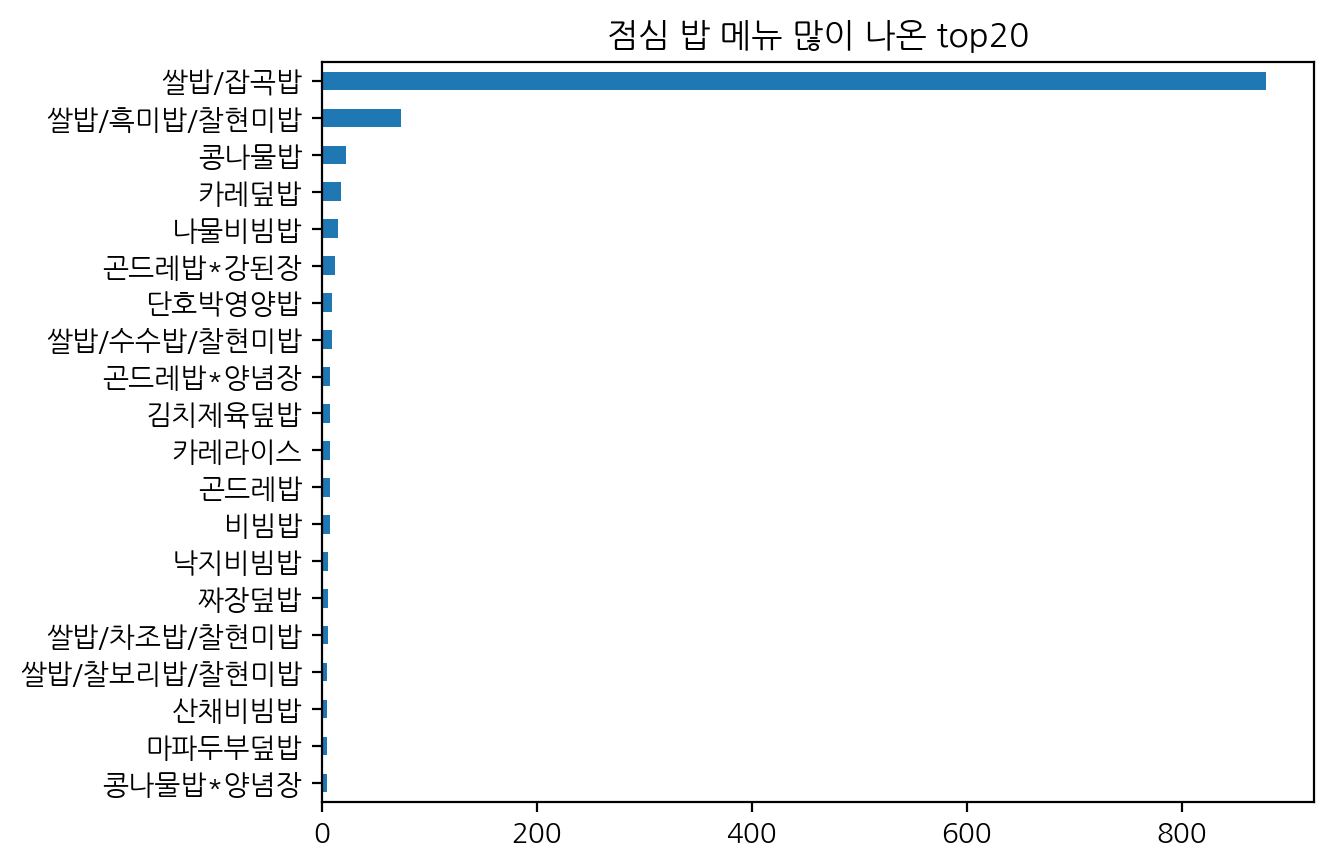

In [285]:
train['밥'].value_counts().nlargest(20).sort_values().plot.barh()
plt.title("점심 밥 메뉴 많이 나온 top20")

In [148]:
train['국'].unique()

array(['오징어찌개', '김치찌개', '팽이장국', '쇠고기무국', '떡국', '시래기국', '꽃게탕', '시금치국',
       '냉이된장국', '유부장국', '대구찌개', '쇠고기느타리국', '콩나물국', '북어계란국', '수제비국',
       '얼갈이된장국', '쇠고기미역국', '근대된장국', '부대찌개', '차돌박이찌개', '북어국', '고추장찌개',
       '배추된장국', '어묵국', '쑥국', '콩나물김치국', '사골우거지국', '쇠고기샤브국', '맑은국', '닭개장',
       '옹심이만두국', '쪽파국', '매운콩나물국', '버섯들깨탕', '순두부찌개', '올갱이아욱국', '냉이된장찌개',
       '육개장', '대구매운탕', '미소장국', '미역국', '돈육김치찌개', '무채국', '매운어묵국', '시래기된장국',
       '오징어국', '된장찌개', '감자고추장찌개', '들깨버섯탕', '열무된장국', '북어콩나물국', '한방갈비탕',
       '미역장국', '쇠고기해장국', '강된장찌개', '오이미역냉국', '참치김치찌개', '도토리묵냉국', '버섯들깨찌개',
       '가쯔오장국', '우무묵냉국', '호박잎찌개', '건새우아욱국', '오이냉국', '사골우거지탕', '우묵콩국',
       '청국장찌개', '부대찌개*라면사리', '복숭아미역냉국', '호박잎된장국', '사과오이냉국', '닭곰탕',
       '해물된장찌개', '버섯매운탕', '두부맑은국', '황태맑은국', '토란국', '아욱된장국', '느타리버섯국',
       '우거지해장국', '시금치된장국', '팽이버섯국', '건새우무국', '꽁치김치말이', '계란국', '동태찌개',
       '알탕', '김치콩나물국', '김치국', '조랭이떡미역국', '설렁탕', '콩비지찌개', '순두부탕', '근대국',
       '홍합탕', '아욱국', '차돌박이된장찌개', '얼갈이국', '사골떡국', '황태국', '짬뽕국', '냉이콩나물국',
      

Text(0.5, 1.0, '점심 국 메뉴 많이 나온 top20')

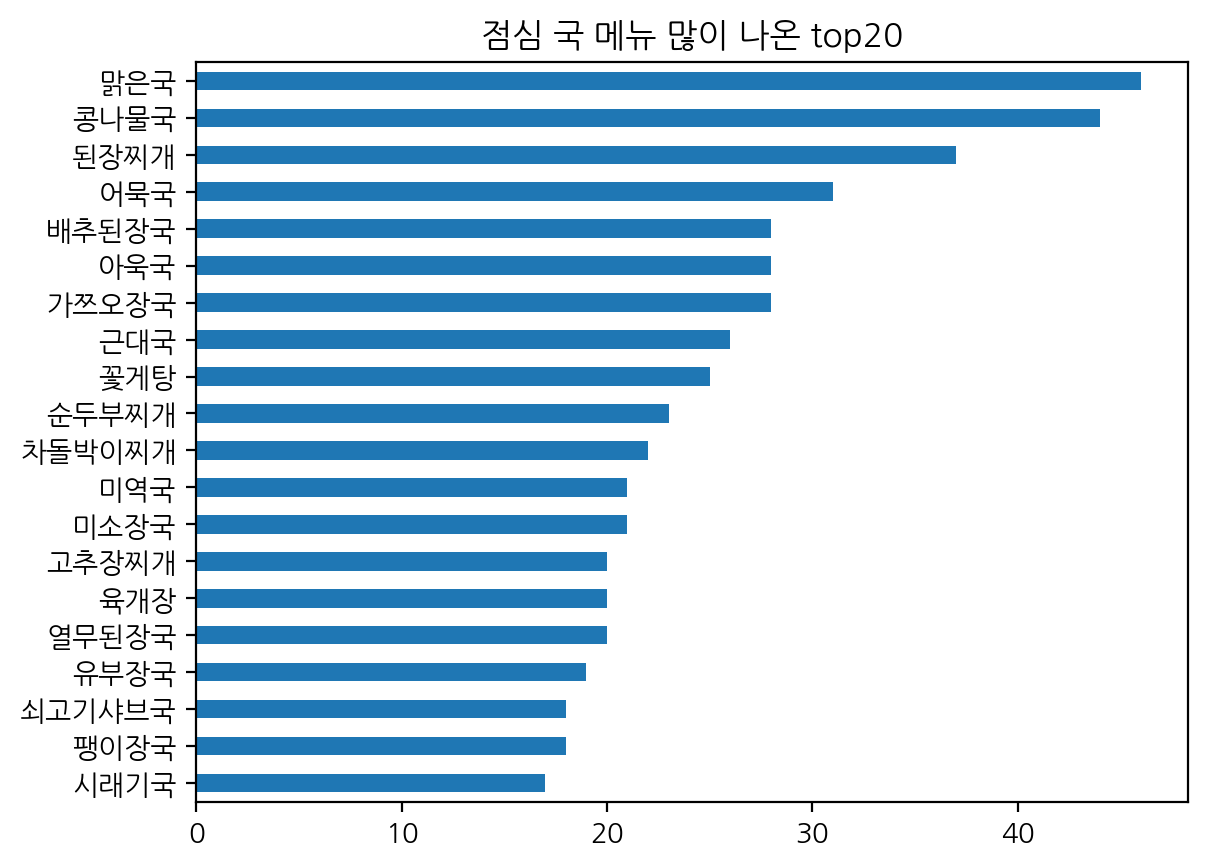

In [286]:
train['국'].value_counts().nlargest(20).sort_values().plot.barh()
plt.title("점심 국 메뉴 많이 나온 top20")

In [166]:
train['반찬1'].unique()

array(['쇠불고기', '가자미튀김', '치킨핑거', '주꾸미볶음', '돈육씨앗강정', '훈제오리구이', '돈육굴소스볶음',
       '닭감자조림', '탕수어', '쇠고기장조림', '고구마치즈구이', '마늘간장치킨', '갈치구이', '돈육간장볶음',
       '소세지피망볶음', '닭갈비', '오징어볶음', '제육볶음', '탕수육', '고등어김치말이', '돈육장조림',
       '닭데리야끼조림', '수제돈가스', '돈육고추장볶음', '소불고기', '미니채소떡갈비', '버섯불고기', '코다리강정',
       '치킨텐더*요거트D', '자반고등어구이', '오징어튀김', '갈치조림', '오징어볶음*소면', '매운돼지갈비찜',
       '순살양념치킨', '쇠고기단호박조림', '돈육강정', '꽁치한마리구이', '매콤떡갈비조림', '쇠고기볶음',
       '등갈비김치찜', '돈간장불고기', '궁중떡찜', '양념파닭', '미트볼조림', '모둠장조림', '돈육칠리강정',
       '찜닭', '닭오븐구이', '쇠고기불고기', '꼬지삼색전', '닭양념조림', '누룽지탕수육', '순살깐풍기',
       '돼지갈비찜', '떡갈비조림', '가자미양념찜', '레몬탕수육', '간장치킨', '돈삼겹보쌈', '매콤낙지볶음',
       '목살데리야끼구이', '고등어구이', '간장돼지갈비찜', '유자청제육볶음', '꽁치김치말이찜', '닭강정',
       '갈릭돈까스', '순살파닭', '사천식탕수육', '매운주꾸미볶음', '돈육떡강정', '목살데리야끼', '고추장불고기',
       '불닭볶음', '동파삼겹수육', '훈제오리냉채', '꽁치오븐구이', '꽃맛살볶음', '매콤돼지갈비찜', '미니함박조림',
       '장어강정', '삼겹살오븐구이', '새우까스&탈탈소스', '고등어조림', '갈릭돈가스', '소고기숙주볶음',
       '고추잡채*꽃빵', '칠리탕수육', '닭볶음', '동태무조림', '마늘치킨', '계란말이', '닭찜',
       '가자미카

Text(0.5, 1.0, '점심 반찬1 많이 나온 top20')

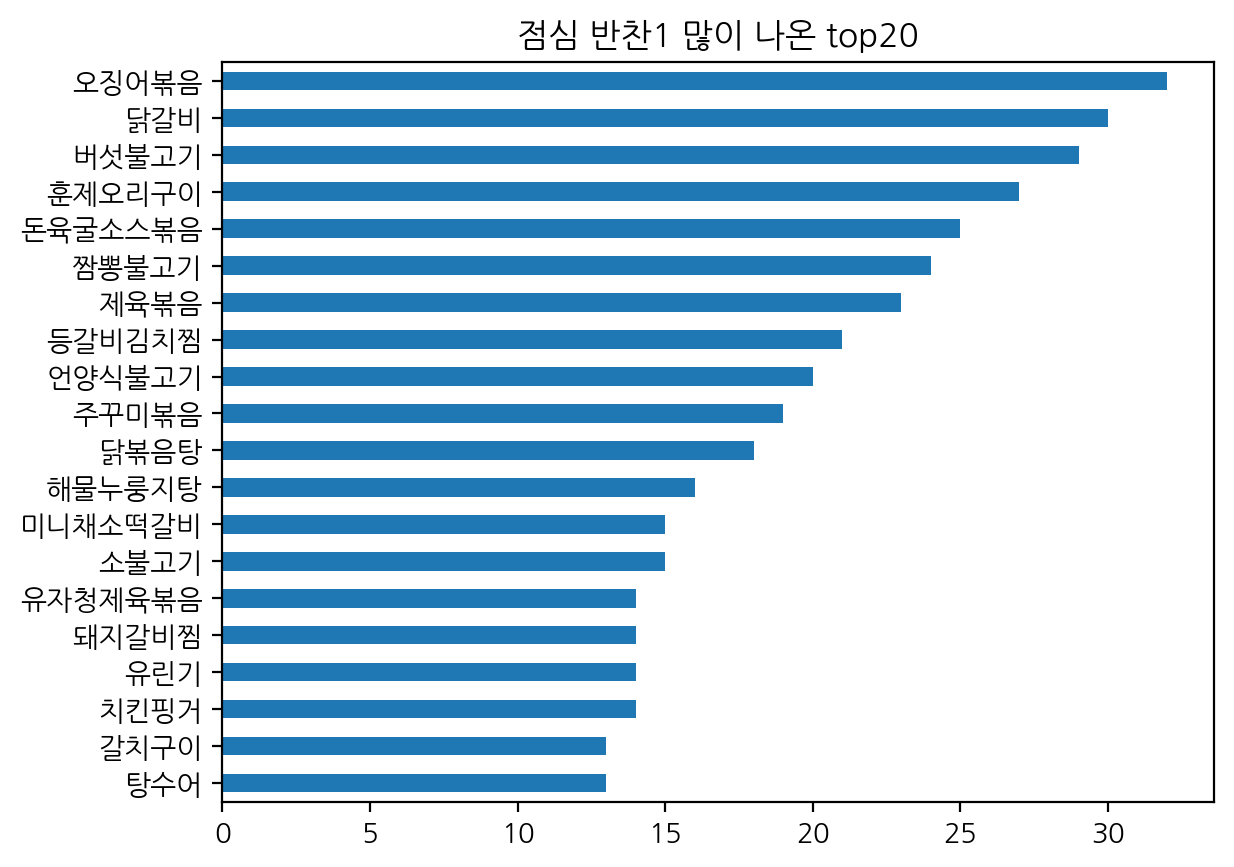

In [287]:
train['반찬1'].value_counts().nlargest(20).sort_values().plot.barh()
plt.title("점심 반찬1 많이 나온 top20")

In [168]:
train['반찬2'].unique()

array(['계란찜', '모둠소세지구이', '쫄면야채무침', '부추전', '우엉잡채', '도토리묵무침', '옥수수전',
       '연두부*양념장', '오징어숙회무침', '통도라지구이', '해초무침', '새송이버섯볶음', '호박꼬지&고사리&무나물',
       '버섯잡채', '맛탕', '새싹두부구이', '늙은호박전', '맛살계란말이', '새송이버섯조림', '메추리알조림',
       '모둠묵*양념장', '소세지구이', '홍어무침', '해물파전', '탕평채', '모둠양채쌈*쌈장', '골뱅이무침*소면',
       '두부계란부침', '파래김*양념장', '연근땅콩조림', '계란말이', '두부&김치볶음', '땅콩조림', '오징어초무침',
       '비엔나볶음', '해파리냉채', '새송이버섯전', '알감자버터구이', '동태전', '브로컬리맛살볶음',
       '모둠소시지구이', '두부조림', '무쌈/양파절임', '열무나물', '양배추쌈', '도라지초무침', '콩나물잡채',
       '고기전', '청포묵무침', '연근조림', '김치전', '치즈계란말이', '동그랑땡부침', '고등어카레구이',
       '맛살겨자채', '온두부', '멸치크랜베리볶음', '꽃맛살볶음', '우엉조림', '비엔나감자볶음', '동그랑땡전',
       '명태조림', '잡채', '궁중떡볶이', '두부구이', '홍어채무침', '맛살콩나물냉채', '참치야채전', '쫄면무침',
       '명태엿장조림', '마늘쫑볶음', '골뱅이무침&소면', '실곤약초무침', '닭가슴살냉채', '두부새싹구이',
       '맛살겨자초무침', '돈육잡채', '감자볶음', '감자만두', '삼치구이', '춘권', '해파리겨자채', '감자채볶음',
       '마늘쫑무침', '닭살겨자냉채', '웨지감자오븐구이', '연근/오징어튀김', '오꼬노미계란말이', '오징어브로컬리숙회',
       '매운어묵볶음', '고구마범벅', '비엔나피망볶음', '꽁치와사비구이', '모듬소시지볶음', '과일샐러드',

Text(0.5, 1.0, '점심 반찬2 많이 나온 top20')

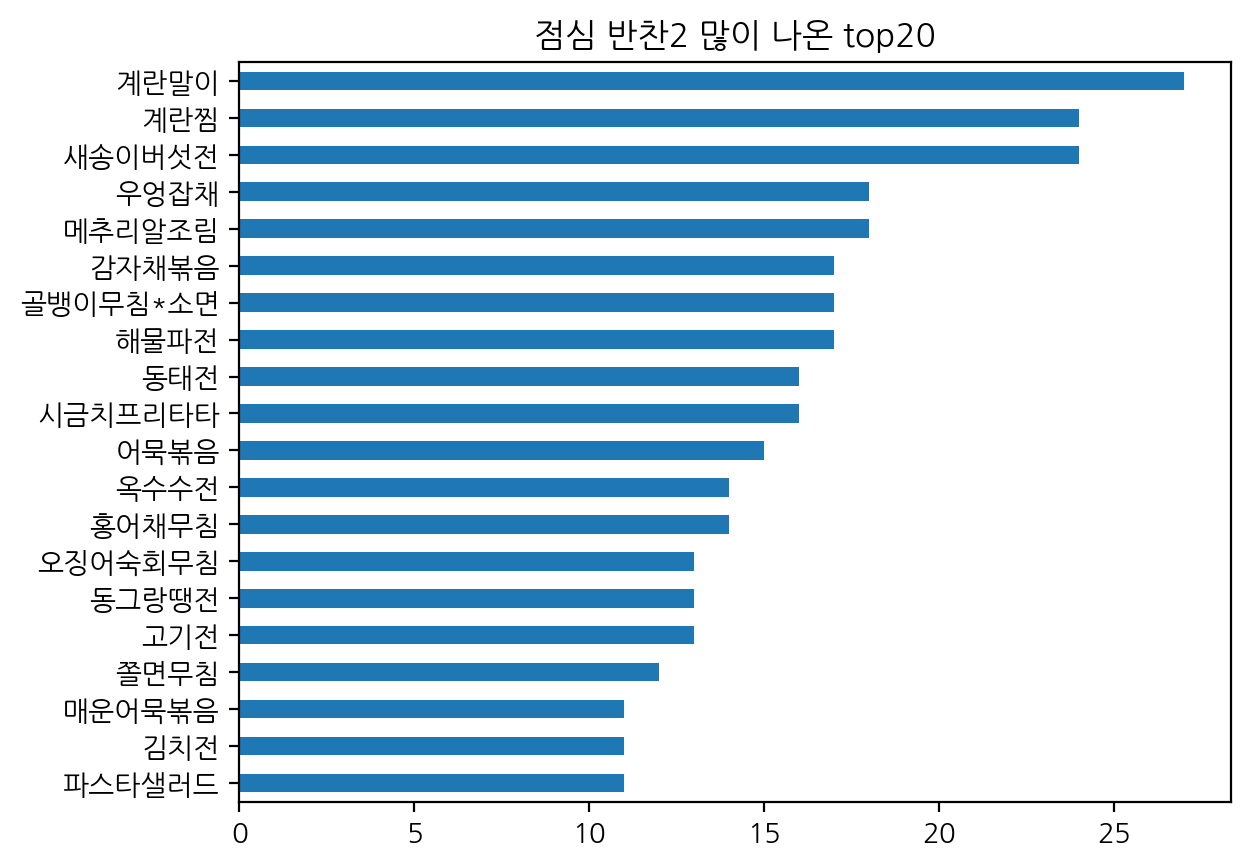

In [288]:
train['반찬2'].value_counts().nlargest(20).sort_values().plot.barh()
plt.title("점심 반찬2 많이 나온 top20")

### 저녁메뉴 변경해보기

* 저녁에는 자기계발의 날이 있음 !

In [241]:
train.head(2)

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0 2016-02-01   0   2601      50     150             238          0.0   
1 2016-02-02   1   2601      50     173             319          0.0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴     중식계  ...  month  day  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  ...      2    1   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  ...      2    2   

        YM  요일명                                         lunch_menu       밥  \
0  2016-02    월      [쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]  쌀밥/잡곡밥   
1  2016-02    화  [쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...  쌀밥/잡곡밥   

       국    반찬1      반찬2                                dinner_menu  
0  오징어찌개   쇠불고기      계란찜  [쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]  
1   김치찌개  가자미튀김  모둠소세지구이    [콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]  

[2 rows x 22 columns]

In [246]:
# 저녁메뉴 리스트 만들기
dinner_menu_list = []

for day in range(len(train)): # 각 행별로 가져오기
    tmp = train.loc[day, '석식메뉴'].split(' ') #띄어쓰기 별로 각각 리스트에 넣어주기
    
    for menu in tmp:
        if '(' in menu:  # 괄호 메뉴 제거
            tmp.remove(menu)
        tmp = ' '.join(tmp).split() # 공백 제거
    
    dinner_menu_list.append(tmp)

['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치']
['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포기김치']
['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음', '포기김치']
['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포기김치']
['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침', '포기김치']
['참치회덮밥', '맑은국', '군만두', '과일샐러드', '락교', '포기김치']
['쌀밥/잡곡밥', '김치콩나물국', '미니함박', '어묵볶음', '물파래무침', '깍두기']
['쌀밥/잡곡밥', '홍합미역국', '등갈비김치찜', '임연수구이', '브로컬리초장', '포기김치']
['쌀밥/잡곡밥', '된장찌개', '쇠불고기', '해파리겨자채', '봄동무침', '포기김치']
['볶음밥*자장소스', '맑은국', '새우또띠아', '쨔샤이무침', '요플레', '포기김치']
['쌀밥/잡곡밥', '순두부찌개', '명태조림', '감자채볶음', '쌈만두', '포기김치']
['쌀밥/잡곡밥', '설렁탕', '김치전', '야채스틱', '바나나', '석박지']
['쌀밥/잡곡밥', '옹심이만두국', '떡갈비조림', '청포묵무침', '부추오이생채', '포기김치']
['쌀밥/잡곡밥', '콩비지찌개', '해물까스&타르타르소스', '볶음쌀국수', '미역레몬초무침', '통배추겉절이']
['쌀밥/잡곡밥', '열무된장국', '매운돼지갈비찜', '멸치호두볶음', '숙주나물', '포기김치']
['김밥', '잔치국수', '교자만두', '찜)', '멕시칸샐러드', '무피클', '포기김치']
['쌀밥/잡곡밥', '닭개장', '삼치구이', '꽃맛살볶음', '청경채사과무침', '포기김치']
['쌀밥/잡곡밥', '버섯들깨탕', '꽁치한마리구이', '두부양념조림', '구이김', '포기김치']
['쌀밥/잡곡밥', '된장찌개', '버섯불고기

In [178]:
# 잘되었는지 데이터프레임 만들어서 확인
dinner_menu = pd.DataFrame(dinner_menu_list)
dinner_menu

0           1             2              3            4  \
0          쌀밥/잡곡밥         육개장       자반고등어구이           두부조림        건파래무침   
1        콩나물밥*양념장         어묵국           유산슬         아삭고추무침          바나나   
2          쌀밥/잡곡밥       청국장찌개        황태양념구이            고기전      새송이버섯볶음   
3        미니김밥*겨자장          우동        멕시칸샐러드           군고구마          무피클   
4          쌀밥/잡곡밥      차돌박이찌개           닭갈비        감자소세지볶음        콩나물무침   
5           참치회덮밥         맑은국           군만두          과일샐러드           락교   
6          쌀밥/잡곡밥      김치콩나물국          미니함박           어묵볶음        물파래무침   
7          쌀밥/잡곡밥       홍합미역국        등갈비김치찜          임연수구이       브로컬리초장   
8          쌀밥/잡곡밥        된장찌개          쇠불고기         해파리겨자채         봄동무침   
9        볶음밥*자장소스         맑은국         새우또띠아          쨔샤이무침          요플레   
10         쌀밥/잡곡밥       순두부찌개          명태조림          감자채볶음          쌈만두   
11         쌀밥/잡곡밥         설렁탕           김치전           야채스틱          바나나   
12         쌀밥/잡곡밥      옹심이만두국         떡갈비조림          청포묵무침       부추오이생채   
13         쌀밥/잡곡밥       콩비지찌개   해물까스&타르타르소스          볶음쌀국수      미역레몬초무침   
14         쌀밥/잡곡밥       열무된장국       매운돼지갈비찜         멸치호두볶음         숙주나물   
15             김밥        잔치국수          교자만두             찜)       멕시칸샐러드   
16         쌀밥/잡곡밥         닭개장          삼치구이          꽃맛살볶음      청경채사과무침   
17         쌀밥/잡곡밥       버섯들깨탕       꽁치한마리구이         두부양념조림          구이김   
18         쌀밥/잡곡밥        된장찌개         버섯불고기         콩나물겨자채        양념깻잎지   
19          멸치주먹밥          우동           떡볶이           군고구마          단무지   
20         쌀밥/잡곡밥        오징어국         미트볼조림           옥수수전         부추생채   
21         쌀밥/잡곡밥        대구찌개       돈육굴소스볶음          감자채볶음        물파래무침   
22           카레덮밥       가쯔오장국      수제고로케*케찹          과일샐러드          오복지   
23         쌀밥/잡곡밥         육개장     생선까스*탈탈소스          야채계란찜        콩나물무침   
24            볶음밥          짬뽕        개성감자만두           타코야끼        꼬들단무지   
25         쌀밥/잡곡밥        연두부탕        코다리무조림        고추잡채*꽃빵        봄동겉절이   
26         쌀밥/잡곡밥      달래된장찌개          간장찜닭         통도라지구이        참나물생채   
27         짜장잡채덮밥        계란파국         참치야채전         꽃맛살샐러드         오이무침   
28         쌀밥/잡곡밥        뼈해장국       해물청경채볶음          버섯메밀전      야채스틱*쌈장   
29        토마토스파게티       양송이스프         미니햄버거          단호박범벅       무피클/음료   
30         쌀밥/잡곡밥         닭곰탕          임연수찜         어묵곤약볶음        돌나물초장   
31         쌀밥/잡곡밥        수제비국        아귀콩나물찜        새송이버섯볶음        봄동겉절이   
32       굴소스파인볶음밥       가쯔오장국        찹쌀순대볶음           궁중떡찜      두반장가지나물   
33         쌀밥/잡곡밥          알탕         동그랑땡전           마파두부        시금치나물   
34          참치회덮밥        미소장국           군만두           콘샐러드          바나나   
35         쌀밥/잡곡밥      냉이된장찌개        누룽지탕수육          감자채볶음        청경채무침   
36         쌀밥/잡곡밥       콩비지찌개           유산슬      해물까스*탈탈소스        도라지나물   
37           햄볶음밥        유부장국        돈육씨앗강정           해초무침          깨찰빵   
38         쌀밥/잡곡밥         어묵국        등갈비김치찜          청포묵무침        애호박나물   
39            주먹밥        잔치국수         또띠아피자          과일샐러드         오이피클   
40         쌀밥/잡곡밥      쇠고기미역국         순살깐풍기            계란찜      숙주미나리나물   
41         쌀밥/잡곡밥        된장찌개         고등어조림            고기전         부추생채   
42          김치볶음밥       가쯔오장국        감자치즈구이         꽃맛살샐러드          단무지   
43         쌀밥/잡곡밥       매운버섯국            찜닭            탕평채        청경채생채   
44             김밥          우동          야채튀김           조각사과          오복지   
45         쌀밥/잡곡밥        오징어국          미니함박         멸치호두볶음      치커리사과무침   
46         쌀밥/잡곡밥       쇠고기무국          가자미찜         계란야채말이      돌나물오이무침   
47         치킨마요덮밥      유부주머니국           떡볶이          단무지무침          오렌지   
48            비빔밥      팽이버섯장국         새우또띠아          견과류조림          피크닉   
49         쌀밥/잡곡밥       들깨미역국         수제돈가스           감자범벅        참나물생채   
50         쌀밥/잡곡밥         꽃게탕           유산슬          야채계란찜      두반장가지나물   
51          낙지비빔밥        유부장국          새싹피자          과일샐러드        꼬들단무지   
52         쌀밥/잡곡밥         어묵국          닭볶

In [305]:
# 이상한 값들 확인해보기
dinner_menu[dinner_menu[0].str.contains('밥|라이스|스파게티|필라프|빠에야')==False]

0           1          2           3          4      5     6  \
139        콩국수         작은밥         춘권       단호박조림      마늘쫑무침   열무김치  None   
173    나가사키면&김       참치주먹밥     개성감자만두      꽃맛살샐러드         음료   포기김치  None   
175     옛날왕돈까스       옥수수스프     샐러드파스타    감자치즈오븐구이       오이피클   포기김치  None   
204          *        None       None        None       None   None  None   
224          *        None       None        None       None   None  None   
244          *        None       None        None       None   None  None   
262          *        None       None        None       None   None  None   
281          *        None       None        None       None   None  None   
300     나가사끼짬뽕       야채볶음밥  치킨핑거*요거트D        또띠아칩  단무지/방울토마토   포기김치  None   
306          *        None       None        None       None   None  None   
327     자기계발의날        None       None        None       None   None  None   
345        콩국수         작은밥      탄두리치킨      모둠묵샐러드         수박  배추겉절이  None   
346   *자기계발의날*        None       None        None       None   None  None   
366       가정의날        None       None        None       None   None  None   
392          *        None       None        None       None   None  None   
412          *        None       None        None       None   None  None   
424          *        None       None        None       None   None  None   
449          *        None       None        None       None   None  None   
468          *        None       None        None       None   None  None   
492          *        None       None        None       None   None  None   
506    (쌀:국내산)        김치우동      오징어튀김      또띠아견과칩    바나나/오복지   포기김치  None   
510          *        None       None        None       None   None  None   
529          *        None       None        None       None   None  None   
586          *        None       None        None       None   None  None   
589          *        None       None        None       None   None  None   
633          *        None       None        None       None   None  None   
667     자기계발의날        None       None        None       None   None  None   
687          *        None       None        None       None   None  None   
706     자기계발의날        None       None        None       None   None  None   
730     자기개발의날        None       None        None       None   None  None   
747          *      자기계발의날          *        None       None   None  None   
766          *      자기개발의날          *        None       None   None  None   
780    (쌀:국내산)        크림스프      미니햄버거        감자튀김    오이피클/음료   포기김치  None   
786          *      자기계발의날          *        None       None   None  None   
809          *      자기개발의날          *        None       None   None  None   
828          *      자기개발의날          *        None       None   None  None   
853     자기계발의날        None       None        None       None   None  None   
872          *        None       None        None       None   None  None   
890          *        None       None        None       None   None  None   
912          *        None       None        None       None   None  None   
932          *        None       None        None       None   None  None   
955          *        None       None        None       None   None  None   
973     자기개발의날        None       None        None       None   None  None   
993     자기개발의날        None       None        None       None   None  None   
1086    우육비빔냉면         추가밥       사골파국  도넛츠/비트채소절임  숙주나물/요구르트    석박지  None   
1088  타워함박스테이크    크림스프/추가밥  알리오올리오파스타   샐러드*오리엔탈D   도라지오이초무침   포기김치  None   
1126      채소라면          김밥    가래떡오븐구이      꽃맛살샐러드        단무지   포기김치  None   
1137       미역국    대패삼겹숙주볶음     연두부계란찜        상추무침       포기김치   None  None   
1140      우거지국       김말이강정        김치전        해초무침       포기김치   None  None   
1162   꼬치어묵매운탕  떡갈비주먹밥/추가밥     채소볶음우동        콘샐러드      단무지무침   포기김치  None   
1166       ＜자기         계발의         날＞        None       None   None  None   
1170     

In [226]:
# 109, 204, 415, 625, 898
dinner_menu.iloc[415]

0     쌀밥/잡곡밥
1      순두부찌개
2    소고기숙주볶음
3    비엔나감자구이
4      청경채무침
5       포기김치
6       None
7       None
Name: 415, dtype: object

In [182]:
# 원본 데이터프레임에 리스트 통째로 파생변수 만들기
train['dinner_menu'] = dinner_menu_list
train.head(2)

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0 2016-02-01   0   2601      50     150             238          0.0   
1 2016-02-02   1   2601      50     173             319          0.0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴     중식계  ...  month  day  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  ...      2    1   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  ...      2    2   

        YM  요일명                                         lunch_menu       밥  \
0  2016-02    월      [쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]  쌀밥/잡곡밥   
1  2016-02    화  [쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...  쌀밥/잡곡밥   

       국    반찬1      반찬2                                dinner_menu  
0  오징어찌개   쇠불고기      계란찜  [쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]  
1   김치찌개  가자미튀김  모둠소세지구이    [콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]  

[2 rows x 22 columns]

In [257]:
# 밥, 국, 반찬1, 반찬2까지 나누자
# 메인3부터는 위치가 달라짐. . . .(3이 있는 것도 있고, 없는 것도 있어서 !)
# 저녁에는 가정의 날이 있어서 그 관련된 문자열 처리 중요 !

d_rice = []
d_soup = []
d_side1 = []
d_side2 = []

for word in dinner_menu_list:
    
    if not word:  # None인 곳 변경
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '*' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
    
    elif '＜자기' in word: # 1166행의 <자기 / 계발의 / 날> 처리 
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
    
    elif '가정의날' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '가정의달' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '자기계발의날' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '*자기계발의날*' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '자기개발의날' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')

    else:
        d_rice.append(word[0])
        d_soup.append(word[1])
        d_side1.append(word[2])
        d_side2.append(word[3])

In [258]:
#잘 들어왔는지 확인
print(len(dinner_menu_list))
print(len(d_rice))
print(len(d_soup))
print(len(d_side1))
print(len(d_side2))

1205
1205
1205
1205
1205


In [259]:
# 원본 train 파일에 합치기
train["d_밥"] = d_rice
train["d_국"] = d_soup
train["d_반찬1"] = d_side1
train["d_반찬2"] = d_side2

In [260]:
train.head(2)

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0 2016-02-01   0   2601      50     150             238          0.0   
1 2016-02-02   1   2601      50     173             319          0.0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴     중식계  ...  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  ...   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  ...   

                                          lunch_menu       밥      국    반찬1  \
0      [쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]  쌀밥/잡곡밥  오징어찌개   쇠불고기   
1  [쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...  쌀밥/잡곡밥   김치찌개  가자미튀김   

       반찬2                                dinner_menu       d_밥  d_국    d_반찬1  \
0      계란찜  [쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]    쌀밥/잡곡밥  육개장  자반고등어구이   
1  모둠소세지구이    [콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]  콩나물밥*양념장  어묵국      유산슬   

    d_반찬2  
0    두부조림  
1  아삭고추무침  

[2 rows x 26 columns]

* 저녁에는 어떤 메뉴가 있나유?

In [264]:
# 잘못 들어가 있는 행 처리
train[train['d_밥'] == '(쌀:국내산)']

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
506 2018-02-22   3   2707      82     277             400          0.0   
780 2019-04-16   1   2822      54     234             552          0.0   

                                                  중식메뉴  \
506  쌀밥/잡곡밥 (쌀:국내산) 콩나물국  마늘치킨  모둠묵*양념장  미역줄기볶음  포기...   
780  쌀밥/잡곡밥 (쌀:국내산) 열무된장국  닭볶음탕 (닭:국내산) 우엉잡채  고구마순나...   

                                                  석식메뉴    중식계  ...  \
506  볶음밥(김밥재료) (쌀:국내산) 김치우동  오징어튀김  또띠아견과칩  바나나/오복지...  988.0  ...   
780  토마토스파게티(작은밥) (쌀:국내산) 크림스프  미니햄버거  감자튀김  오이피클/음...  905.0  ...   

                                      lunch_menu       밥      국   반찬1  \
506  [쌀밥/잡곡밥, 콩나물국, 마늘치킨, 모둠묵*양념장, 미역줄기볶음, 포기김치]  쌀밥/잡곡밥   콩나물국  마늘치킨   
780    [쌀밥/잡곡밥, 열무된장국, 닭볶음탕, 우엉잡채, 고구마순나물, 포기김치]  쌀밥/잡곡밥  열무된장국  닭볶음탕   

         반찬2                                    dinner_menu      d_밥   d_국  \
506  모둠묵*양념장  [(쌀:국내산), 김치우동, 오징어튀김, 또띠아견과칩, 바나나/오복지, 포기김치]  (쌀:국내산)  김치우동   
780     우엉잡채    [(쌀:국내산), 크림스프, 미니햄버거, 감자튀김, 오이피클/음료, 포기김치]  (쌀:국내산)  크림스프   

     d_반찬1   d_반찬2  
506  오징어튀김  또띠아견과칩  
780  미니햄버거    감자튀김  

[2 rows x 26 columns]

In [271]:
# 밥류에 괄호 들어가는 행 괄호 삭제 변경해주기
print(train['석식메뉴'].iloc[506])
print(train['석식메뉴'].iloc[780])

볶음밥(김밥재료) (쌀:국내산) 김치우동  오징어튀김  또띠아견과칩  바나나/오복지  포기김치 (김치:국내산) 
토마토스파게티(작은밥) (쌀:국내산) 크림스프  미니햄버거  감자튀김  오이피클/음료  포기김치 (김치:국내산) 


In [272]:
# import warnings
# warnings.filterwarnings('ignore')

train['d_밥'].iloc[506] = '볶음밥'
train['d_밥'].iloc[780] = '토마토스파게티'

/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_25073/3210417122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['d_밥'].iloc[506] = '볶음밥'
/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_25073/3210417122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['d_밥'].iloc[780] = '토마토스파게티'


#### 메뉴 함 잘 봐보자!

In [273]:
train['d_밥'].unique()

array(['쌀밥/잡곡밥', '콩나물밥*양념장', '미니김밥*겨자장', '참치회덮밥', '볶음밥*자장소스', '김밥',
       '멸치주먹밥', '카레덮밥', '볶음밥', '짜장잡채덮밥', '토마토스파게티', '굴소스파인볶음밥', '햄볶음밥',
       '주먹밥', '김치볶음밥', '치킨마요덮밥', '비빔밥', '낙지비빔밥', '오므라이스', '짜장덮밥', '참치주먹밥',
       '김치볶음밥/계란', '돈까스김밥', '유부초밥', '새우살볶음밥', '짜장잡채밥', '날치알볶음밥', '충무김밥',
       '김밥/맑은국', '작은밥/맑은국', '볶음밥/짜장소스', '콩나물밥', '카레라이스', '작은밥', '김밥볶음밥',
       '콩국수', '굴소스해물볶음밥', '쇠고기숙주규동덮밥', '통새우김밥', '나가사키면&김', '옛날왕돈까스',
       '낙지볶음덮밥', '생선초밥', '후난식볶음밥', 'None', '해물굴소스볶음밥', '마파두부덮밥',
       '김치참치주먹밥', '쇠고기덮밥', '날치알김치볶음밥', '참치야채비빔밥', '베이컨김치볶음밥', '해물볶음밥',
       '나가사끼짬뽕', '닭갈비볶음밥', '야채볶음밥', '꼬마김밥*겨자장', '소고기주먹밥', '빠에야', '목살필라프',
       '김치주먹밥', '산채비빔밥', '낙지덮밥', '볶음밥*짜장소스', '볶음밥&짜장소스', '하와이안필라프',
       '야채주먹밥', '곤드레밥*강된장', '투움바스파게티', '짜장밥', '새우볶음밥', '쌀밥/옛날돈까스',
       '잡채밥&짜장소스', '파인애플볶음밥', '삼겹살볶음밥', '잡채밥/짜장소스', '베이컨볶음밥', '중국식볶음밥',
       '제육김치덮밥', '김치필라프', '참치덮밥', '쌀밥', '짜장면/작은밥', '참치마요덮밥', '굴소스볶음밥',
       '쇠고기볶음밥', '스팸주먹밥', '유산슬덮밥', '버섯영양밥*우렁양념장', '찹쌀밥', '마늘베이컨볶음밥',
       '스팸볶음밥

Text(0.5, 1.0, '저녁 밥 많이 나온 top20')

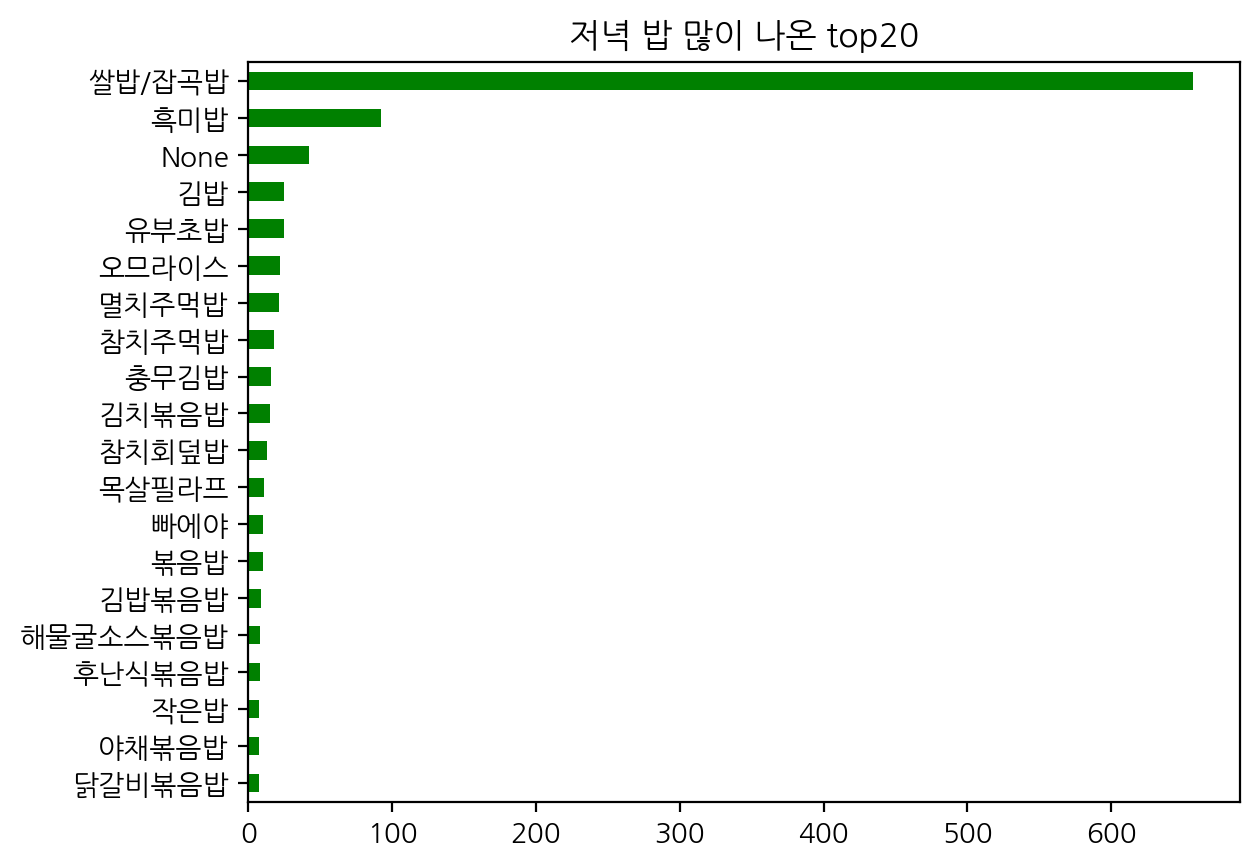

In [292]:
train['d_밥'].value_counts().nlargest(20).sort_values().plot.barh(color='g')
plt.title("저녁 밥 많이 나온 top20")

In [278]:
train['d_국'].unique()

array(['육개장', '어묵국', '청국장찌개', '우동', '차돌박이찌개', '맑은국', '김치콩나물국', '홍합미역국',
       '된장찌개', '순두부찌개', '설렁탕', '옹심이만두국', '콩비지찌개', '열무된장국', '잔치국수', '닭개장',
       '버섯들깨탕', '오징어국', '대구찌개', '가쯔오장국', '짬뽕', '연두부탕', '달래된장찌개', '계란파국',
       '뼈해장국', '양송이스프', '닭곰탕', '수제비국', '알탕', '미소장국', '냉이된장찌개', '유부장국',
       '쇠고기미역국', '매운버섯국', '쇠고기무국', '유부주머니국', '팽이버섯장국', '들깨미역국', '꽃게탕',
       '팽이버섯국', '비빔메밀국수', '들깨버섯탕', '북어국', '부대찌개*라면사리', '가쯔오국', '팽이장국',
       '해물순두부찌개', '쌀국수', '시래기국', '열무물국수', '냉모밀국수', '소고기미역국', '호박잎찌개',
       '비빔국수', '토마토스파게티', '김치찌개', '계란국', '김치말이국수', '차돌박이된장찌개', '시금치국',
       '함박스테이크', '부대찌개', '쇠고기샤브국', '물냉면', '느타리버섯국', '동태찌개', '돈육김치찌개',
       '콩가루배추국', '아욱국', '콩나물국', '짬뽕수제비국', '콩국수', '스파게티/크림스프', '김치우동',
       '무채국', '감자국', '작은밥', '콩나물냉국', '로제파스타/스프', '얼갈이된장국', '참치김치찌개',
       '고추장찌개', '꼬지어묵우동', '무채맑은국', '조갯살미역국', '근대된장국', '황태국', '어묵우동',
       '해물된장찌개', '참치주먹밥', '옥수수스프', '북어계란국', '바지락수제비', '해물짬뽕', '목살김치찌개',
       '시금치된장국', 'None', '매운감자국', '대구지리', '매생이굴국', '미역국', '봄동된장국',
       '매운

Text(0.5, 1.0, '저녁 국 많이 나온 top20')

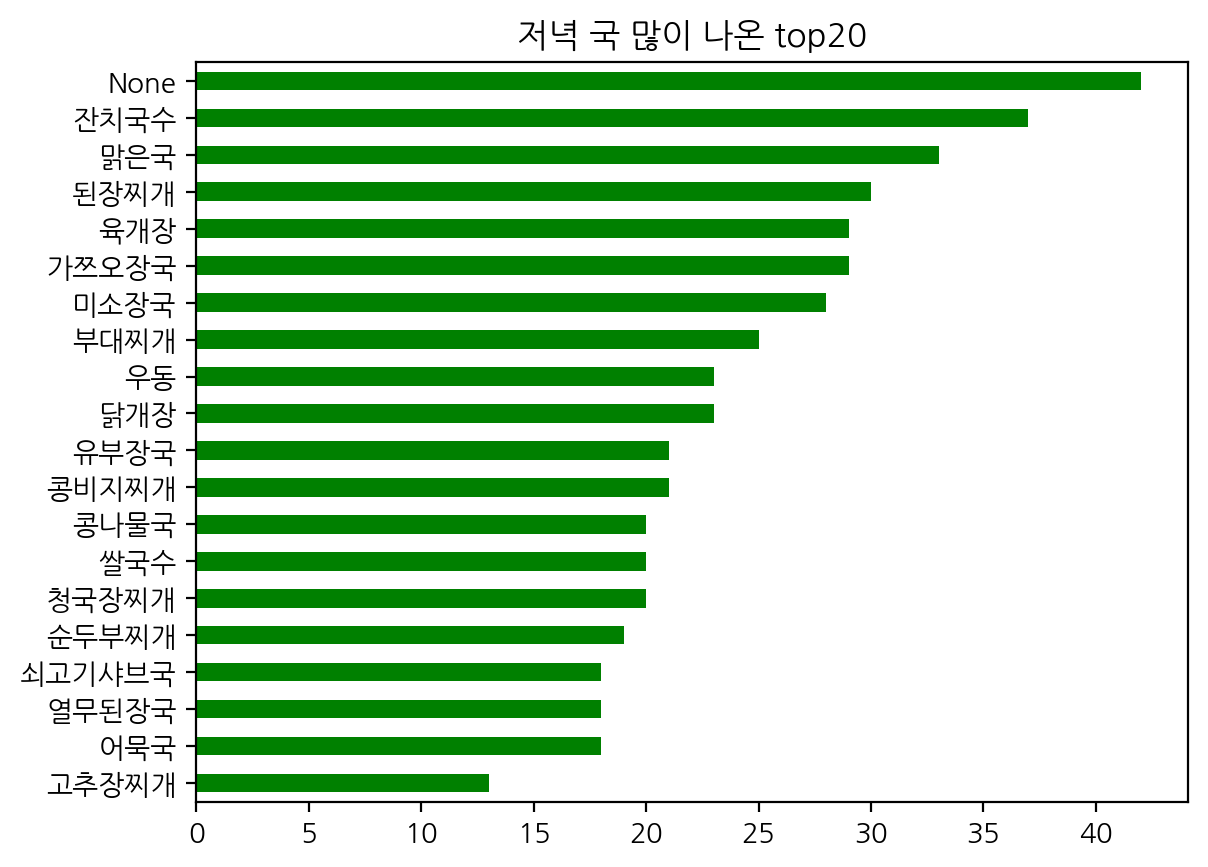

In [294]:
train['d_국'].value_counts().nlargest(20).sort_values().plot.barh(color='g')
plt.title("저녁 국 많이 나온 top20")

In [279]:
train['d_반찬1'].unique()

array(['자반고등어구이', '유산슬', '황태양념구이', '멕시칸샐러드', '닭갈비', '군만두', '미니함박',
       '등갈비김치찜', '쇠불고기', '새우또띠아', '명태조림', '김치전', '떡갈비조림', '해물까스&타르타르소스',
       '매운돼지갈비찜', '교자만두', '삼치구이', '꽁치한마리구이', '버섯불고기', '떡볶이', '미트볼조림',
       '돈육굴소스볶음', '수제고로케*케찹', '생선까스*탈탈소스', '개성감자만두', '코다리무조림', '간장찜닭',
       '참치야채전', '해물청경채볶음', '미니햄버거', '임연수찜', '아귀콩나물찜', '찹쌀순대볶음', '동그랑땡전',
       '누룽지탕수육', '돈육씨앗강정', '또띠아피자', '순살깐풍기', '고등어조림', '감자치즈구이', '찜닭',
       '야채튀김', '가자미찜', '수제돈가스', '새싹피자', '닭볶음탕', '해물까스*탈탈소스', '탕수어',
       '쇠고기퀘사디아', '가쯔오장국', '고추잡채*꽃빵', '고추장불고기', '탕수육', '수제미니햄버거', '가자미튀김',
       '해물누룽지탕', '코다리강정', '주꾸미볶음', '사천식탕수육', '꽁치허브구이', '데리야끼파닭',
       '고구마치즈구이', '춘권*칠리소스', '돈육청경채볶음', '미니함박조림', '수제돈까스', '미트볼케찹조림',
       '오징어무침', '삼치데리야끼구이', '훈제오리냉채', '치킨핑거*요거트D', '콘샐러드', '양송이스프',
       '모둠장조림', '탕수만두', '감자버터구이', '깐풍기', '오징어볶음', '단호박스프', '수제핫도그',
       '과일샐러드', '쇠고기장조림', '고등어카레구이', '너비아니*부추생채', '치킨핑거', '돈까스', '순대야채볶음',
       '등뼈묵은지찜', '소불고기', '소고기퀘사디아', '쭈꾸미볶음', '치킨텐더', '삼치된장구이', '왕새우튀김',
       '훈제오리/무쌈

Text(0.5, 1.0, '저녁 반찬1 많이 나온 top20')

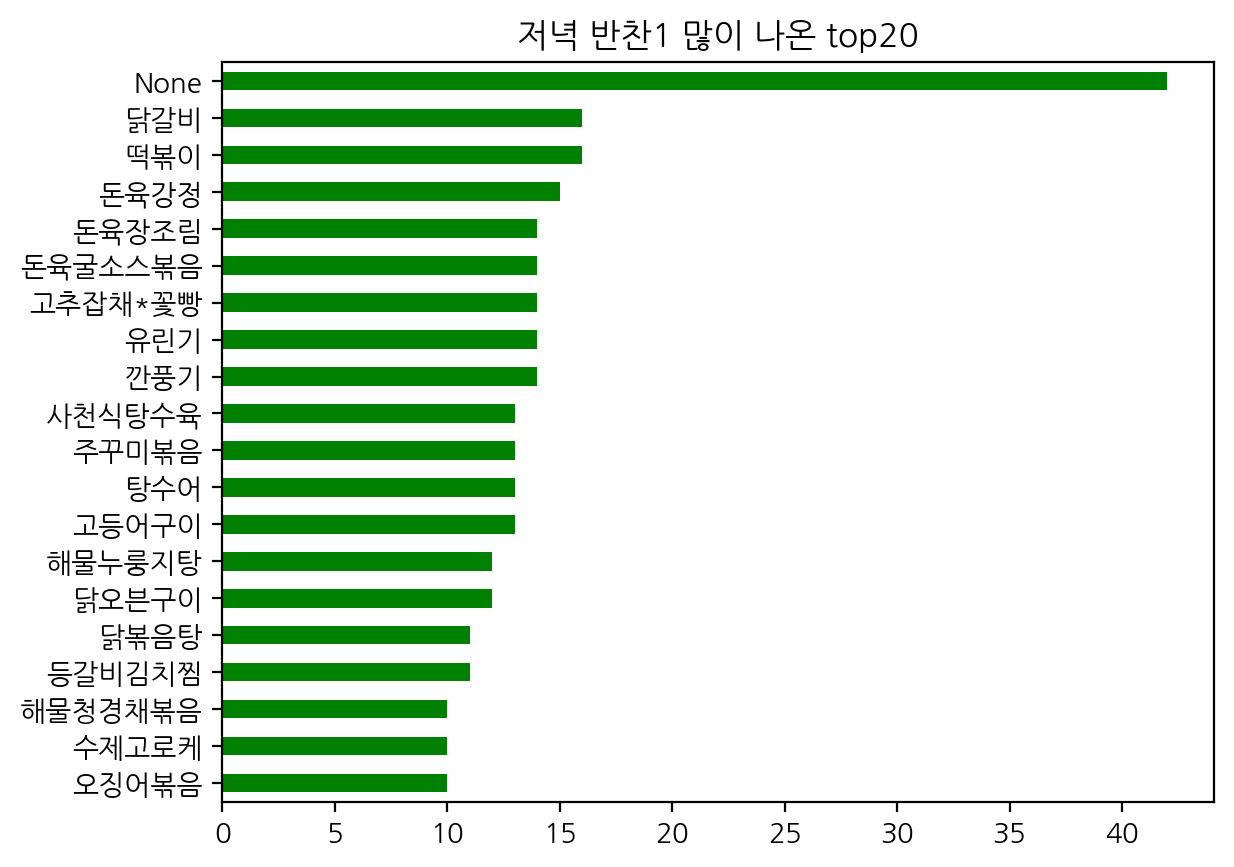

In [295]:
train['d_반찬1'].value_counts().nlargest(20).sort_values().plot.barh(color='g')
plt.title("저녁 반찬1 많이 나온 top20")

In [281]:
train['d_반찬2'].unique()

array(['두부조림', '아삭고추무침', '고기전', '군고구마', '감자소세지볶음', '과일샐러드', '어묵볶음',
       '임연수구이', '해파리겨자채', '쨔샤이무침', '감자채볶음', '야채스틱', '청포묵무침', '볶음쌀국수',
       '멸치호두볶음', '찜)', '꽃맛살볶음', '두부양념조림', '콩나물겨자채', '옥수수전', '야채계란찜',
       '타코야끼', '고추잡채*꽃빵', '통도라지구이', '꽃맛살샐러드', '버섯메밀전', '단호박범벅', '어묵곤약볶음',
       '새송이버섯볶음', '궁중떡찜', '마파두부', '콘샐러드', '해물까스*탈탈소스', '해초무침', '계란찜',
       '탕평채', '조각사과', '계란야채말이', '단무지무침', '견과류조림', '감자범벅', '새송이버섯전',
       '쫄면무침', '모둠묵*양념장', '오이무침', '비엔나케찹볶음', '탕수만두', '두부계란구이', '모듬양채쌈',
       '삼치구이', '오이소박이', '모둠소시지구이', '감자만두', '치즈계란말이', '마늘쫑무침', '잡채',
       '두부계란부침', '군만두', '메추리알조림', '콩나물무침', '락교', '계란말이', '도토리묵무침',
       '감자채햄볶음', '땅콩조림', '단호박범벅/오이피클', '우엉잡채', '야채튀김', '햄맛살볶음', '떡볶이',
       '해물가스*탈탈소스', '찐햇감자', '연근땅콩조림', '쇠고기퀘사디아', '주꾸미초무침', '멕시칸샐러드',
       '비엔나컬리플라워볶음', '새우까스*탈탈소스', '옥수수감자범벅', '동그랑땡전', '홍시드레싱샐러드',
       '베이컨계란말이', '무초절임', '비엔나감자볶음', '실곤약초무침', '크랜베리단호박샐러드', '꽈리고추어묵조림',
       '열대과일샐러드', '모둠버섯볶음', '연두부*양념', '해물파전', '날치알계란찜', '가자미찜', '단무지/락교',
       '양장피잡채', '두부구이

Text(0.5, 1.0, '저녁 반찬2 많이 나온 top20')

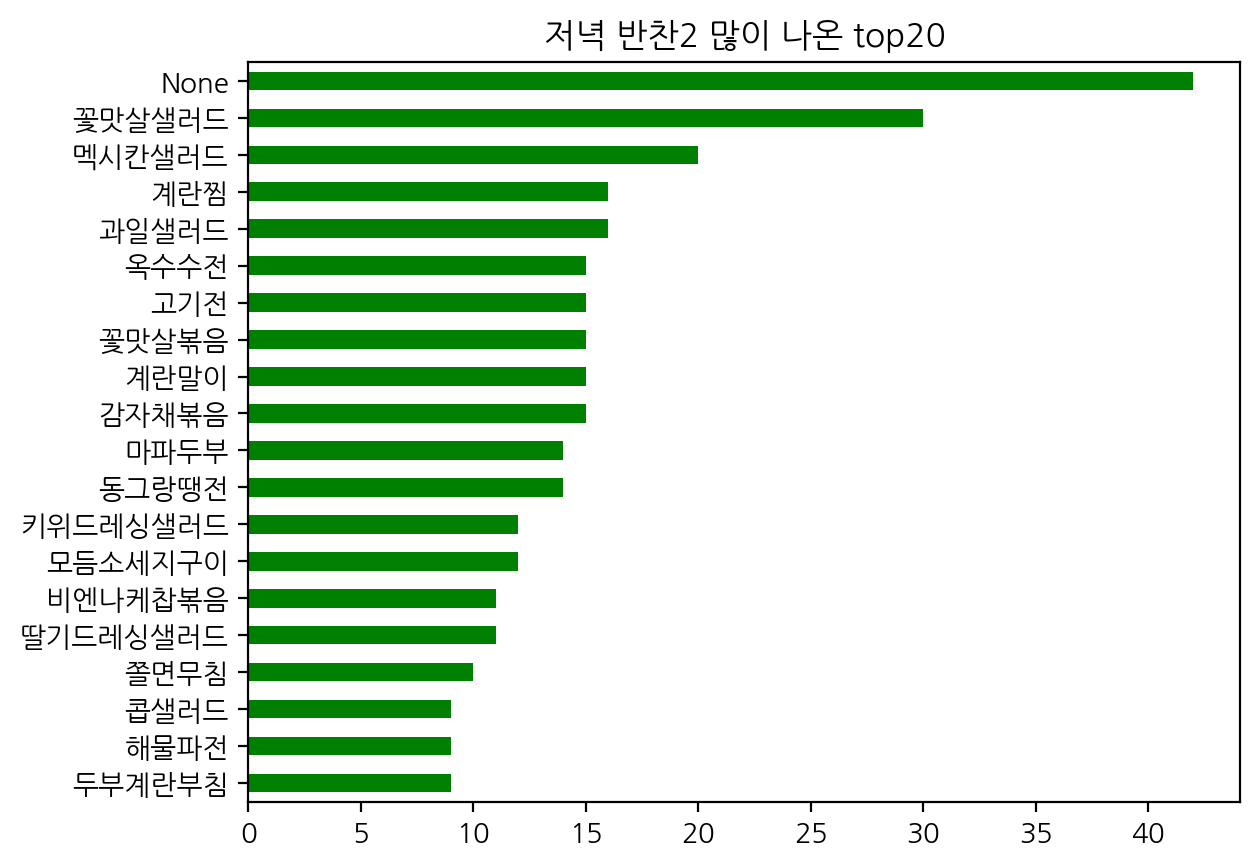

In [296]:
train['d_반찬2'].value_counts().nlargest(20).sort_values().plot.barh(color='g')
plt.title("저녁 반찬2 많이 나온 top20")

# EDA

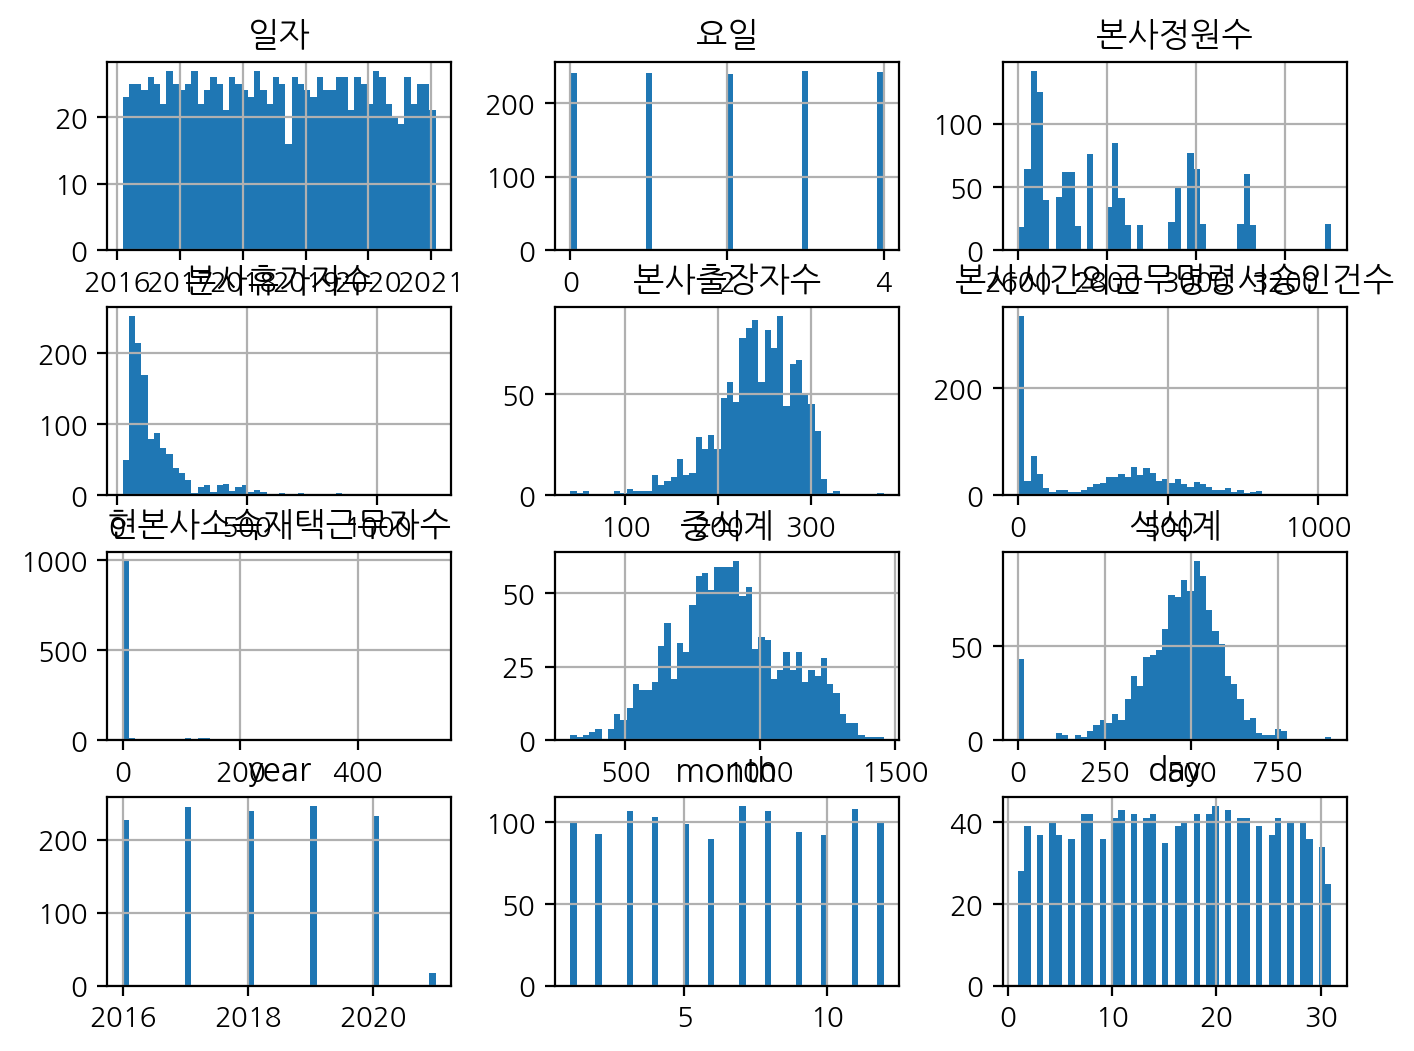

In [313]:
train.hist(figsize=(8,6), bins=50);

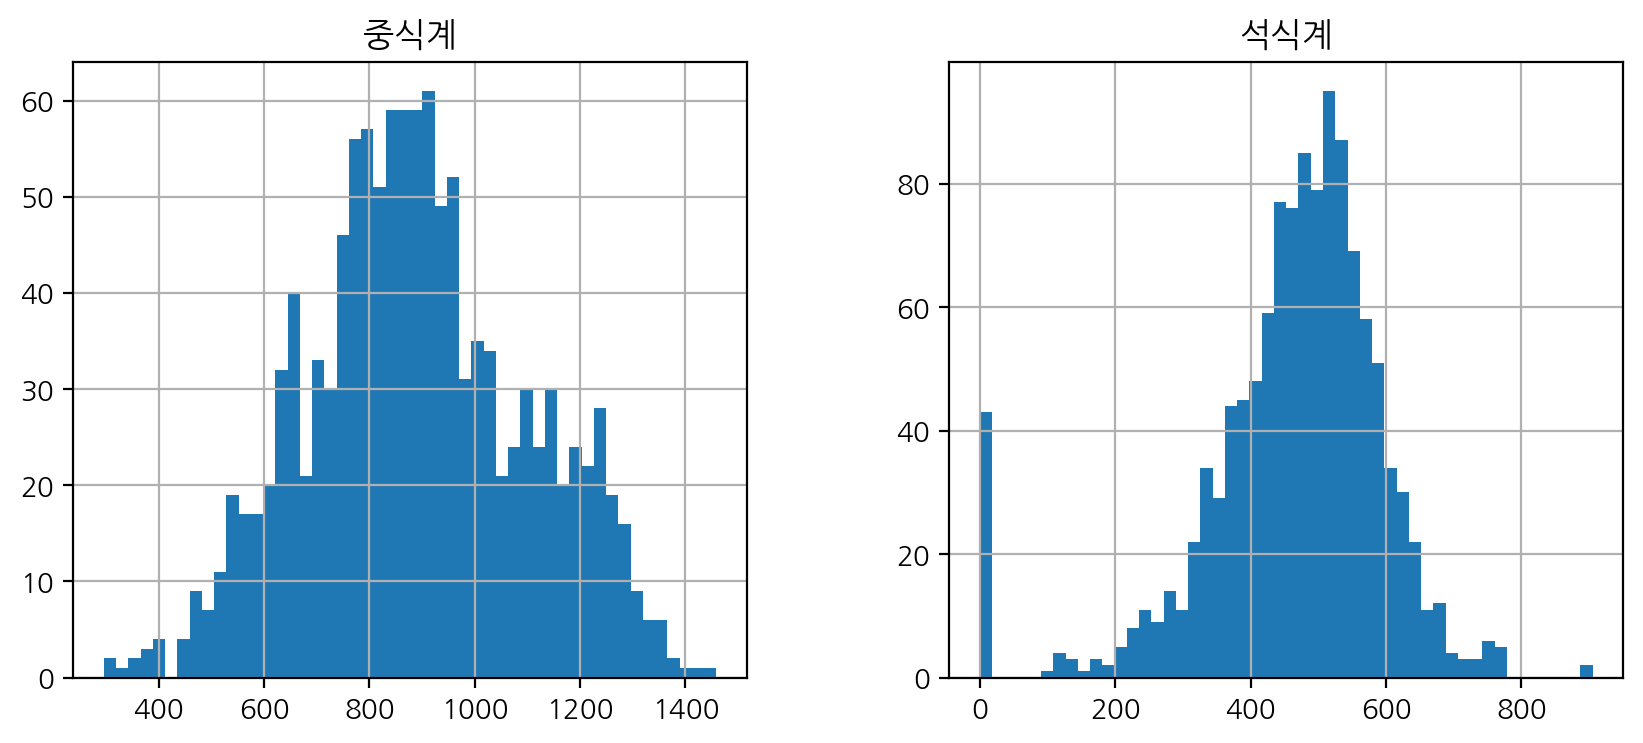

In [316]:
train[["중식계", "석식계"]].hist(figsize=(10,4), bins=50);

* TARGET값이 골고루 분포되어 있습니다.
* 두 plot의 x축의 값이 다름을 주의합시다.
* 석식계 0이 40건 이상이 있네요.

In [319]:
train[train['석식계']== 0]

일자  요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
204  2016-11-30   2   2689      68     207               0          0.0   
224  2016-12-28   2   2705     166     225               0          0.0   
244  2017-01-25   2   2697      79     203               0          0.0   
262  2017-02-22   2   2632      75     252               0          0.0   
281  2017-03-22   2   2627      53     235               0          0.0   
306  2017-04-26   2   2626      45     304               0          0.0   
327  2017-05-31   2   2637      43     265               0          0.0   
346  2017-06-28   2   2648      58     259               0          0.0   
366  2017-07-26   2   2839     254     246               0          0.0   
392  2017-09-01   4   2642     177     303              45          0.0   
410  2017-09-27   2   2642      70     265               0          0.0   
412  2017-09-29   4   2642     214     248              22          0.0   
424  2017-10-25   2   2645      75     289               0          0.0   
449  2017-11-29   2   2644      78     261               0          0.0   
468  2017-12-27   2   2665     169     255               0          0.0   
492  2018-01-31   2   2655      56     223               0          0.0   
502  2018-02-14   2   2707     418     159               0          0.0   
510  2018-02-28   2   2707     134     278               0          0.0   
529  2018-03-28   2   2714      45     252               0          0.0   
549  2018-04-25   2   2714      66     285               0          0.0   
571  2018-05-30   2   2721      80     281               0          0.0   
589  2018-06-27   2   2728      66     277               0          0.0   
609  2018-07-25   2   2704     226     256               1          0.0   
633  2018-08-29   2   2996     103     258               0          0.0   
648  2018-09-19   2   2763      77     288               0          0.0   
667  2018-10-31   2   2805     111     306               0          0.0   
687  2018-11-28   2   2815      69     298               1          0.0   
706  2018-12-26   2   2846     184     241               0          0.0   
730  2019-01-30   2   2985      66     226               1          0.0   
747  2019-02-27   2   2806     100     274               0          0.0   
766  2019-03-27   2   2836      92     259               0          0.0   
786  2019-04-24   2   2822      59     273               0          0.0   
809  2019-05-29   2   2825      50     237               0          0.0   
828  2019-06-26   2   2758      69     282               0          0.0   
853  2019-07-31   2   2760     495     231               0          0.0   
872  2019-08-28   2   3305     123     274               0          0.0   
890  2019-09-25   2   3111      60     285               1          0.0   
912  2019-10-30   2   3121     122     294               1          0.0   
932  2019-11-27   2   3104     134     288               1          0.0   
955  2019-12-31   1   3111     709     149              22          0.0   
973  2020-01-29   2   2821     101     214               4          0.0   
993  2020-02-26   2   2872     109     190               4          0.0   
1166 2020-11-25   2   3021     206     191               3        387.0   

                                                   중식메뉴  \
204   나물비빔밥 (쌀:국내산) 가쯔오장국  치킨핑거*요거트D  감자샐러드  오복지무침  ...   
224   콩나물밥 (쌀:국내산) 가쯔오장국  미트볼케찹조림  꽃맛살샐러드  군고구마  배추겉...   
244   카레덮밥 (쌀:국내산) 맑은국  유린기  개성감자만두  오이사과무침  포기김치 (김...   
262   나물비빔밥 (쌀:국내산) 유부장국  생선까스*탈탈소스  파스타샐러드  마늘쫑볶음  ...   
281   쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개  유린기  비엔나볶음  세발나물  깍두기 (...   
306   비빔밥 (쌀:국내산) 맑은국  오징어튀김  견과류조림  하와이안샐러드  깍두기 (김...   
327   열무보리비빔밥 (쌀:국내산) 가쯔오장국  탕수만두  콥샐러드  오이지무침  포기김치...   
346   콩나물밥 (쌀:국내산) 얼갈이된장국  삼치구이  잡채  아삭고추무침  깍두기 (김치...   
366   나물비빔밥  미소장국  파스타샐러드  소세지오븐구이  오렌지  포기김치 (김치:국내산)    
392   쌀밥/잡곡밥 (쌀:국내산) 시래기국  훈제오리구이  두부구이*양념장  쌈무/양파절임...   
410   쌀밥/잡곡밥 (쌀:국내산) 콩나물국  삼겹살구이  어묵볶음  상추파무침  포기김치 ...   
412 

/Users/jomac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


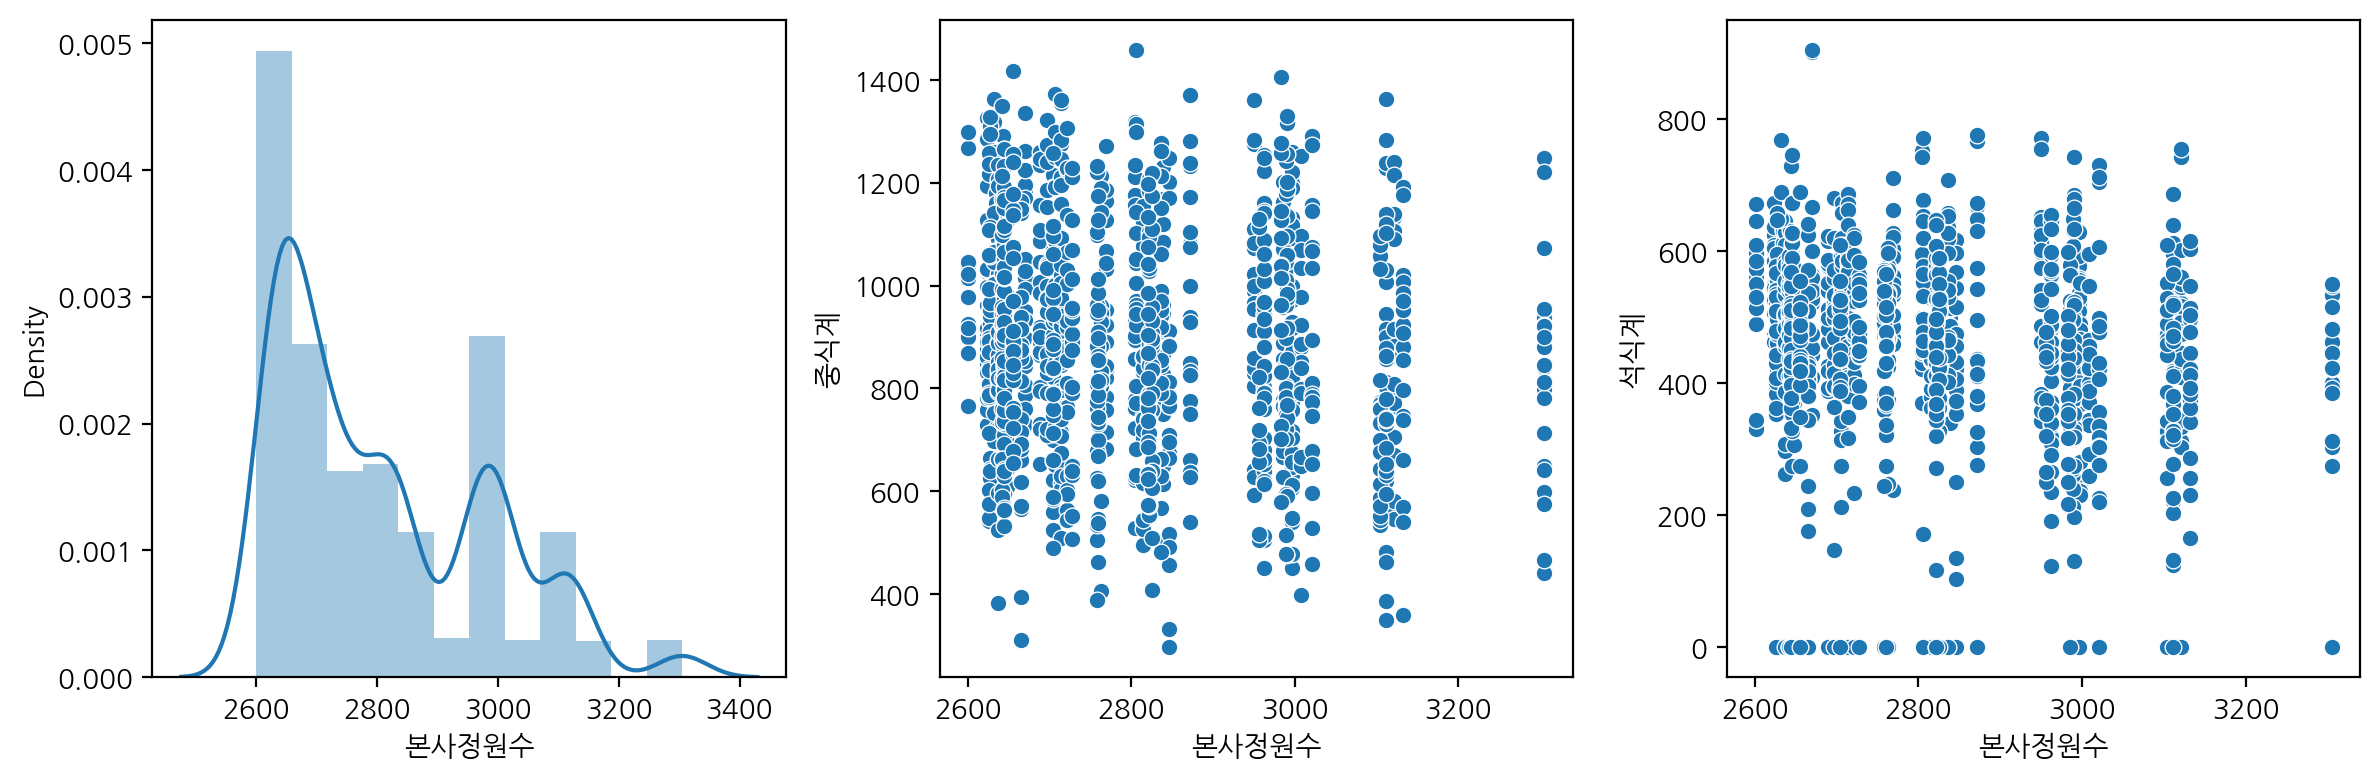

In [320]:
f, ax =plt.subplots(1,3,figsize=(12,4))
sns.distplot(train['본사정원수'],ax=ax[0])
sns.scatterplot(data=train, x='본사정원수',y='중식계',ax=ax[1])
sns.scatterplot(data=train, x='본사정원수',y='석식계',ax=ax[2])

plt.tight_layout()

<AxesSubplot:>

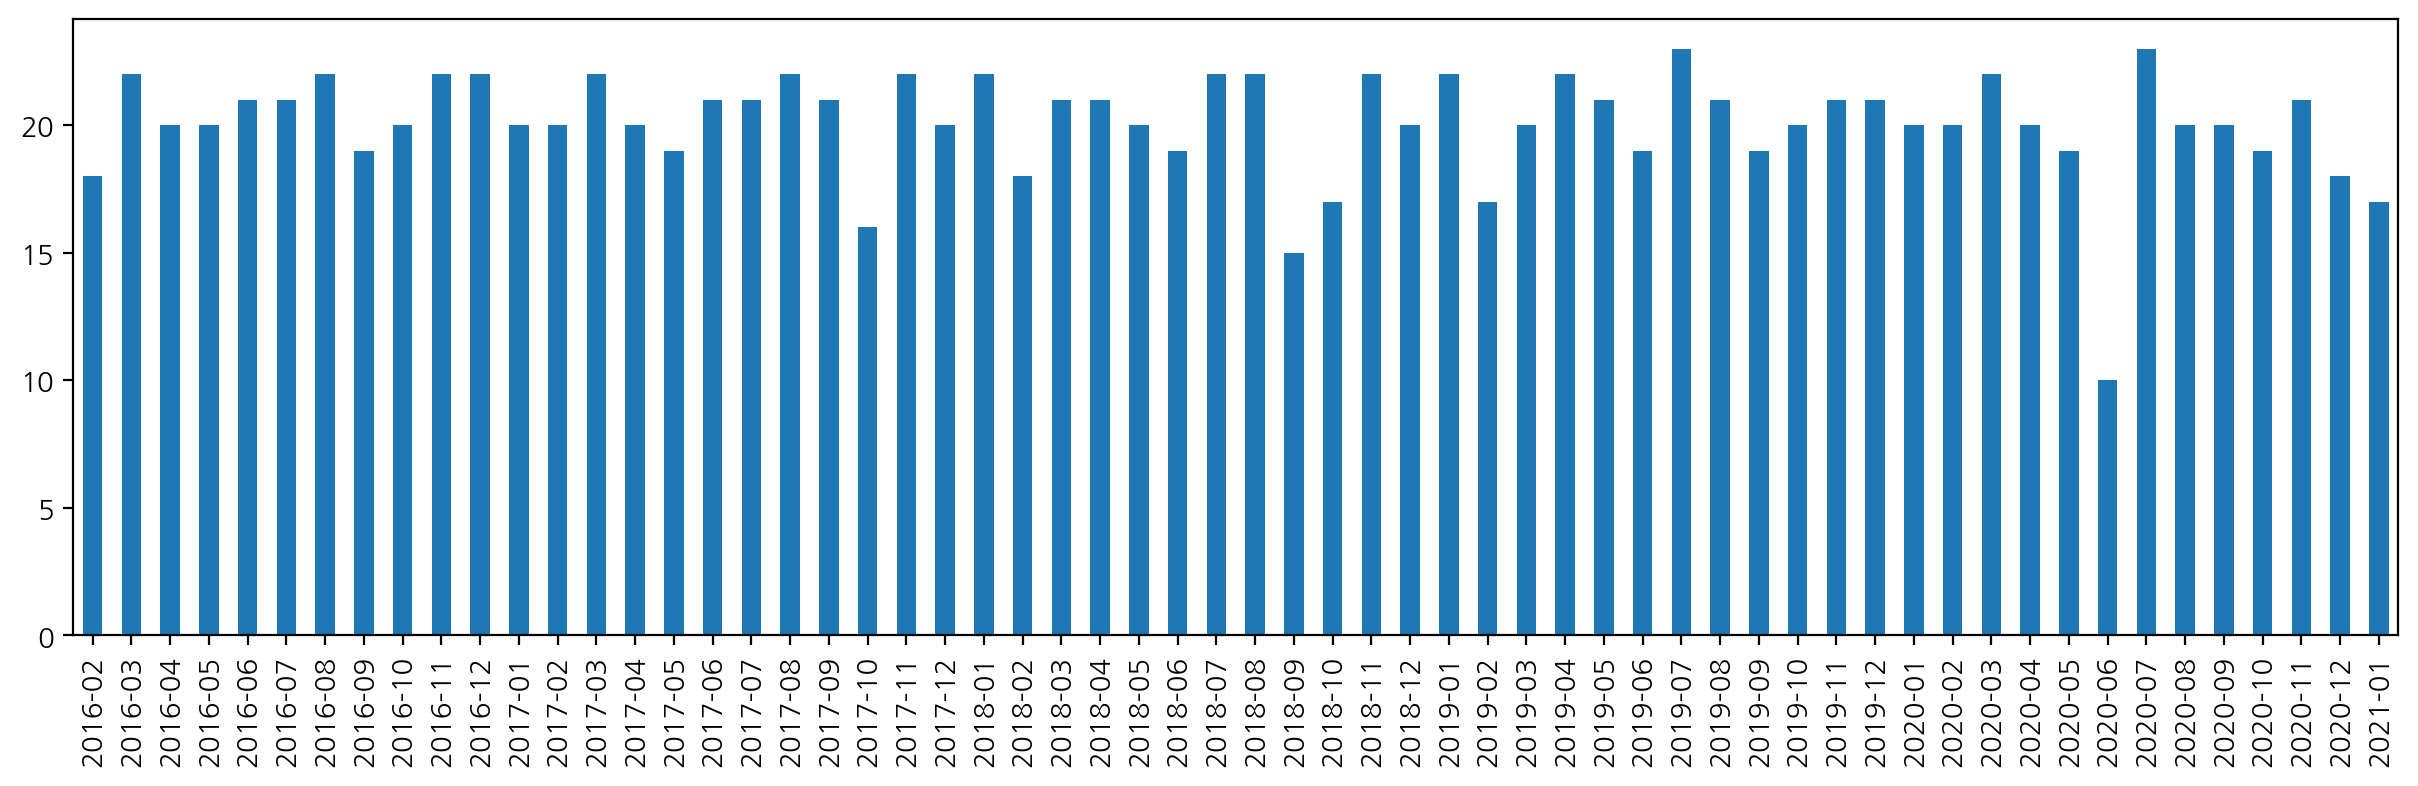

In [325]:
train["YM"].value_counts().sort_index().plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='일자', ylabel='석식계'>

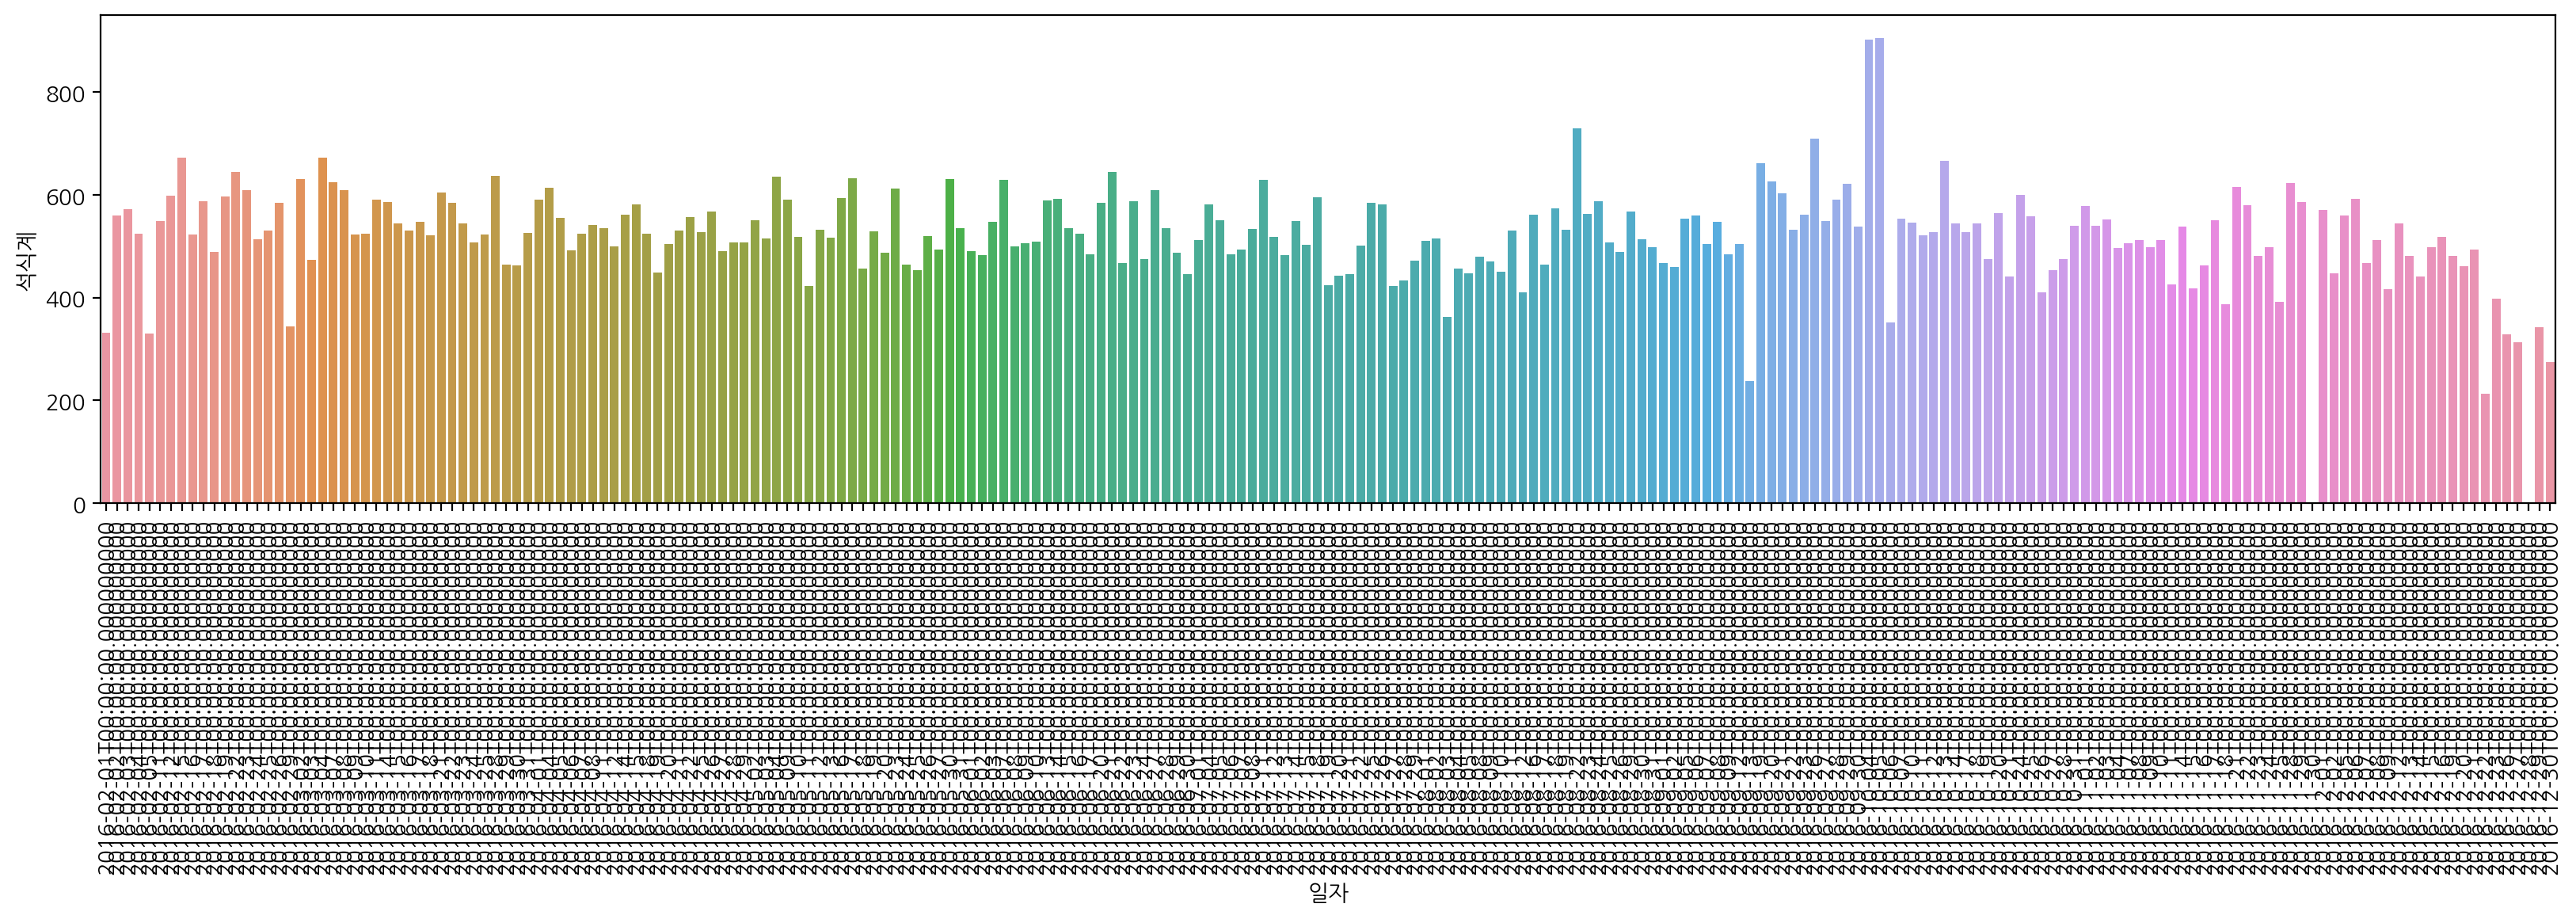

In [322]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=train[train["year"]==2016], x='일자', y='석식계')